# Imports

In [1]:
# general
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# model selection
from sklearn.model_selection import train_test_split

# preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures,RobustScaler
from imblearn.over_sampling import SMOTE

# for confidence intervals
import scipy.stats

# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, roc_auc_score, f1_score, plot_confusion_matrix, plot_roc_curve, roc_curve

# regularisation
from sklearn.linear_model import Ridge, Lasso

# sensitivity analysis of k in k-fold cross-validation
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Context

Credit risk is defined as the probability of a loss when the borrower can not pay back a loan or the borrowed sum. If customers don’t repay their credit, the lender loses money. And, if this loss happens on a large enough scale, it’s impact can be quite huge.  

Most common scoring tools that we find in the wild like the Fico or the Vantage scores, only takes into account financial factors and previous credit performance of the customers.  

We want to test a model that allows us to take into account the profiling of the customers. Factors like where they life, for how long have they been working, how many children do they have, are they single or married, what is their education background or do they own a car or house?

# Tasks

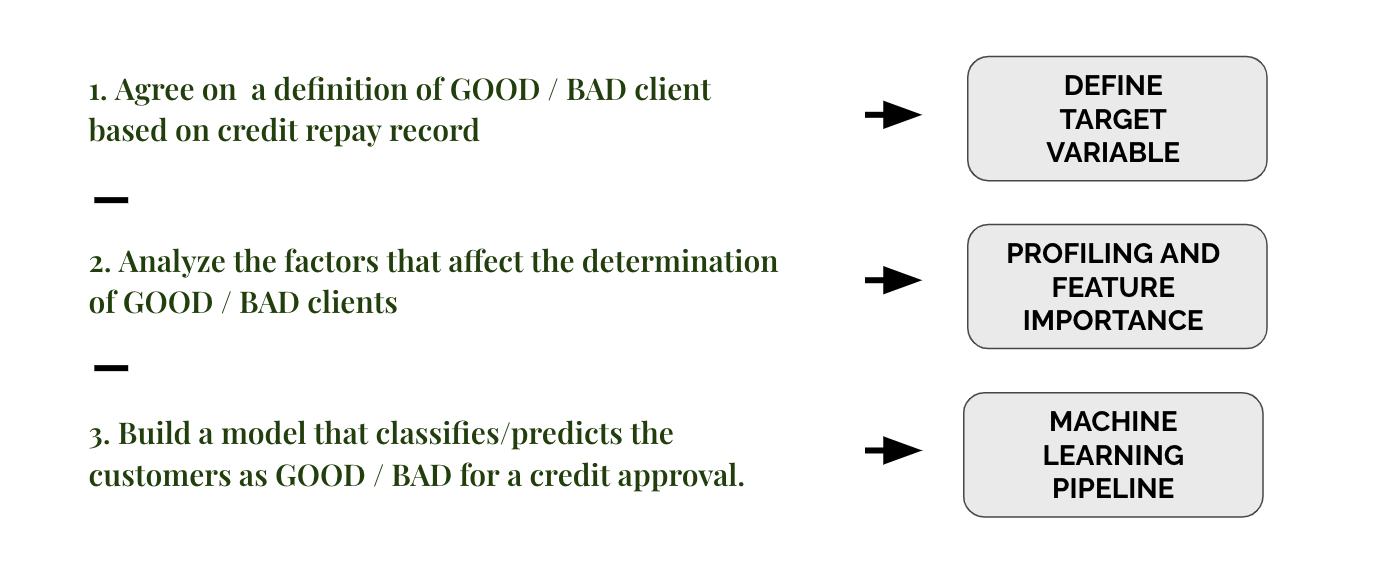

# Workflow

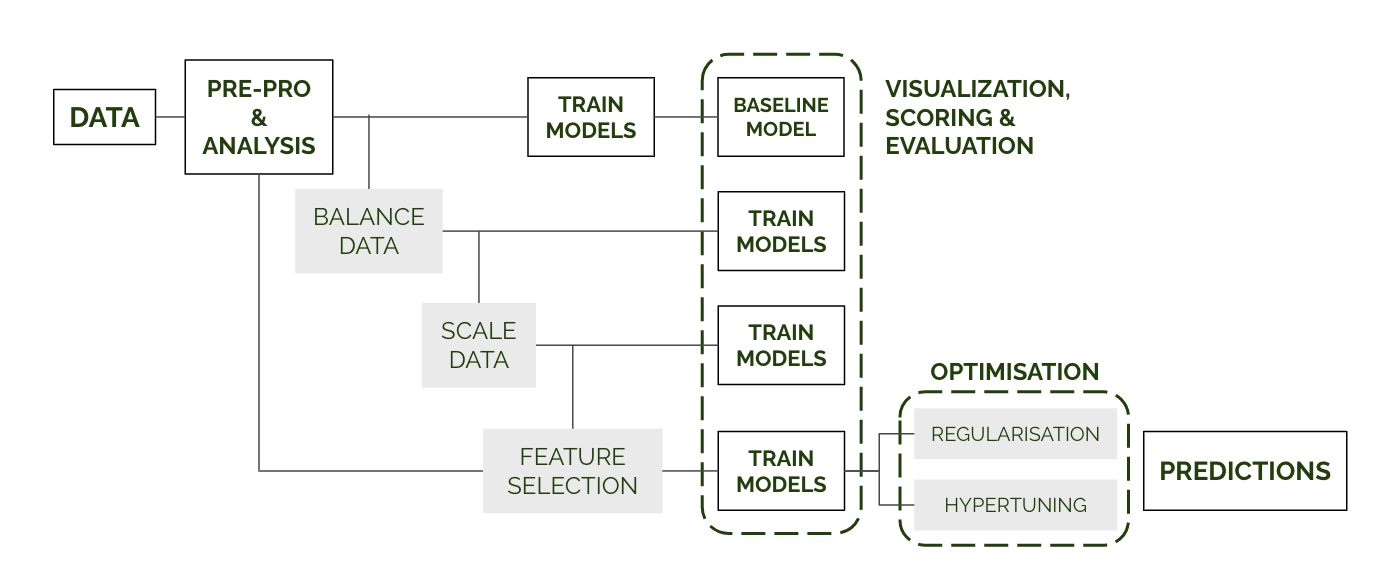

# Content

The application_record.csv dataset contains:

- ID:	Client number	
- CODE_GENDER:	Gender	
- FLAG_OWN_CAR:	Is there a car	
- FLAG_OWN_REALTY:	Is there a property	
- CNT_CHILDREN:	Number of children	
- AMT_INCOME_TOTAL:	Annual income	
- NAME_INCOME_TYPE:	Income category	
- NAME_EDUCATION_TYPE:	Education level	
- NAME_FAMILY_STATUS:	Marital status	
- NAME_HOUSING_TYPE:	Way of living	
- DAYS_BIRTH:	Birthday	Count backwards from current day (0), -1 means yesterday
- DAYS_EMPLOYED:	Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.
- FLAG_MOBIL:	Is there a mobile phone	
- FLAG_WORK_PHONE:	Is there a work phone	
- FLAG_PHONE:	Is there a phone	
- FLAG_EMAIL:	Is there an email	
- OCCUPATION_TYPE:	Occupation	
- CNT_FAM_MEMBERS:	Family size	

The credit_record.csv dataset contains:

- ID:	Client number	
- MONTHS_BALANCE:	Record month	The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
- STATUS:	Status	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

# Datasets

In [2]:
application = pd.read_csv("../dataset/application_record.csv")
credit = pd.read_csv("../dataset/credit_record.csv")

In [3]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


# 1. TARGET VARIABLE

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [6]:
# create a new column with the debt score
credit['CREDIT_SCORE'] = None
# substitute the original status values for the scoring: 
# 1 for debt (2, 3, 4 or 5),
# 0 for no-debt or debt returned within 60 days (0, 1, C, X)
credit.loc[credit['STATUS'] == '2', 'CREDIT_SCORE'] = 1
credit.loc[credit['STATUS'] == '3', 'CREDIT_SCORE'] = 1
credit.loc[credit['STATUS'] == '4', 'CREDIT_SCORE'] = 1
credit.loc[credit['STATUS'] == '5', 'CREDIT_SCORE'] = 1
credit.loc[credit['STATUS'] == '0', 'CREDIT_SCORE'] = 0
credit.loc[credit['STATUS'] == '1', 'CREDIT_SCORE'] = 0
credit.loc[credit['STATUS'] == 'C', 'CREDIT_SCORE'] = 0
credit.loc[credit['STATUS'] == 'X', 'CREDIT_SCORE'] = 0


In [7]:
credit['MONTHS_BALANCE'].value_counts()

-1     34436
-2     34209
 0     33856
-3     33854
-4     33365
       ...  
-56     2109
-57     1649
-58     1255
-59      820
-60      415
Name: MONTHS_BALANCE, Length: 61, dtype: int64

In [8]:
credit['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [9]:
credit['CREDIT_SCORE'].value_counts()

0    1045471
1       3104
Name: CREDIT_SCORE, dtype: int64

### Defining good/bad clients

We will tag the customer as **bad** if there is a debt_value > 0, which means that the customer hasn't paid the credit back more than two months in a row anytime in a period of 60 months back. Otherwise, the customer will be tagged as **good**.  

In [10]:
score = credit.drop(['STATUS', 'MONTHS_BALANCE'], axis=1)
score = score.groupby('ID').sum()

In [11]:
score['CREDIT_SCORE'][score['CREDIT_SCORE'] > 0] = 1 # bad client
score['CREDIT_SCORE'][score['CREDIT_SCORE'] == 0] = 0 # good client

In [12]:
print(f'SCORE VALUE COUNTS (0=good, 1=bad):\n {score.value_counts()} \n SCORE PERCENTAGE (0=good, 1=bad):\n {score.value_counts(normalize=True)}')

SCORE VALUE COUNTS (0=good, 1=bad):
 CREDIT_SCORE
0               45318
1                 667
dtype: int64 
 SCORE PERCENTAGE (0=good, 1=bad):
 CREDIT_SCORE
0               0.985495
1               0.014505
dtype: float64


Different options to tag the customers could be used as well. And could be tested to see if the model we build upon this tagging is more strict or not. For example, we could tag the customer as **bad** if there is a debt_value/months_count > 0.1, which means that the customer hasn't paid the credit back within a period of 60 days more than the 10% of times the credit was used. Otherwise, the customer would be tagged as **good**.

# Merge datasets

In [13]:
len(set(application['ID']).intersection(set(credit['ID']))) # how many IDs do two tables share?

36457

In [14]:
data = pd.merge(application, score, how='inner', on='ID')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [16]:
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CREDIT_SCORE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1


# 2. DATA ANALYSIS

### TARGET VARIABLE

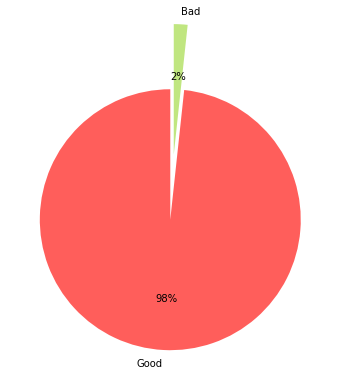

In [17]:
category_names = ['Good', 'Bad']
sizes = [98.3, 1.7]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=category_names, textprops={'fontsize': 10}, colors=['#FF5E5B', '#C0E680'], startangle=90, autopct='%.0f%%', explode=[0, 0.5])
plt.title=("TARGET DISTRIBUTION")
plt.show()

plt.show()

In [18]:
ticks=[i for i in range(0, 101, 10)]
ticks

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

### DEPENDENT VARIABLES

#### CORRELATION MATRIX

<AxesSubplot:>

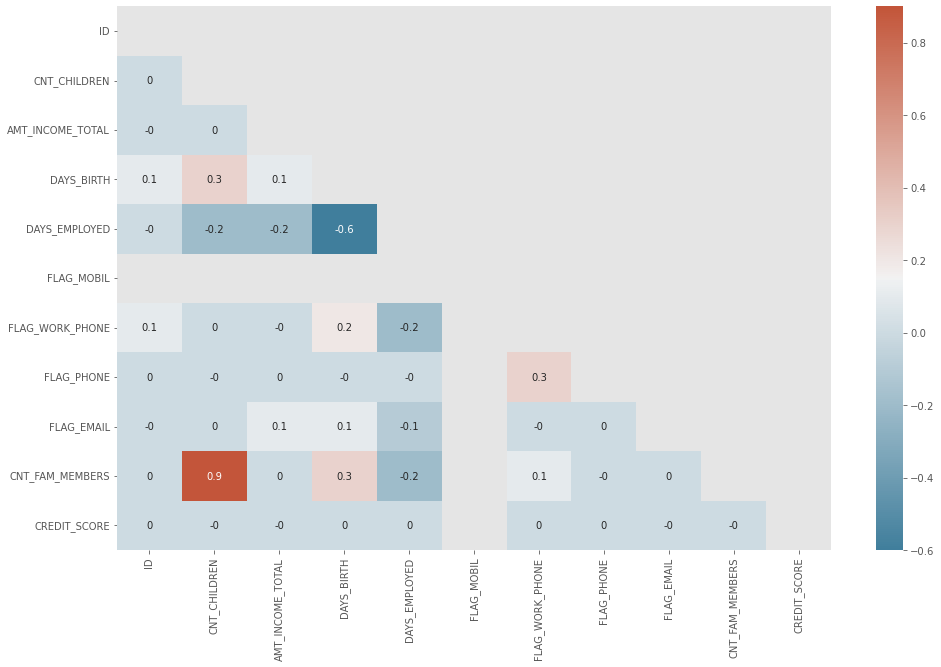

In [20]:
f, ax = plt.subplots(figsize=(16,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = data.corr().round(1)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

### Spliting the clients Good/Bad

In [21]:
data_good = data[data["CREDIT_SCORE"] == 0]
data_bad = data[data["CREDIT_SCORE"] == 1]

#### COMPARING GOOD/BAD PROFILES

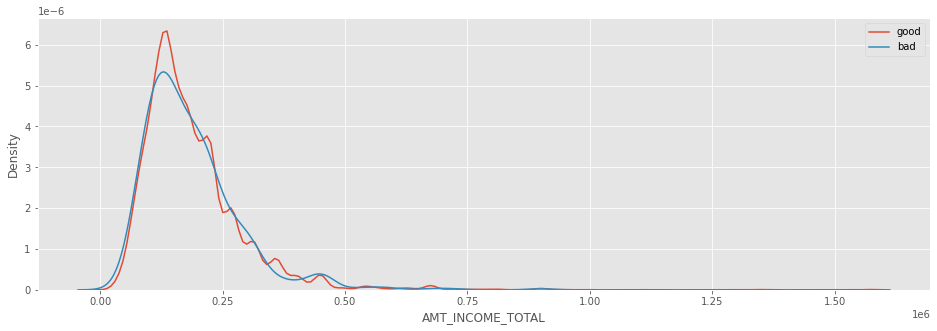

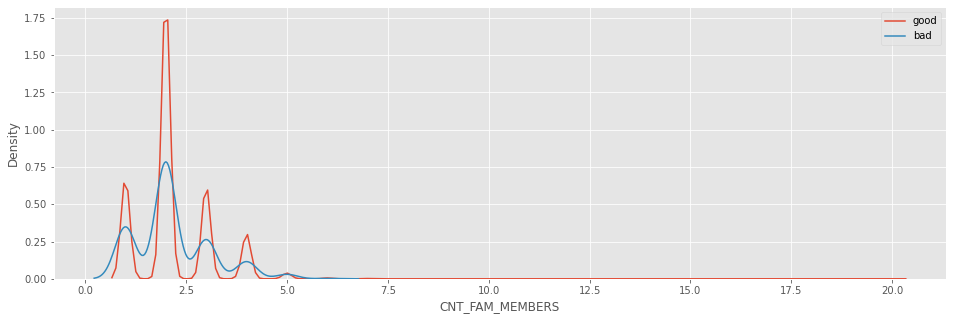

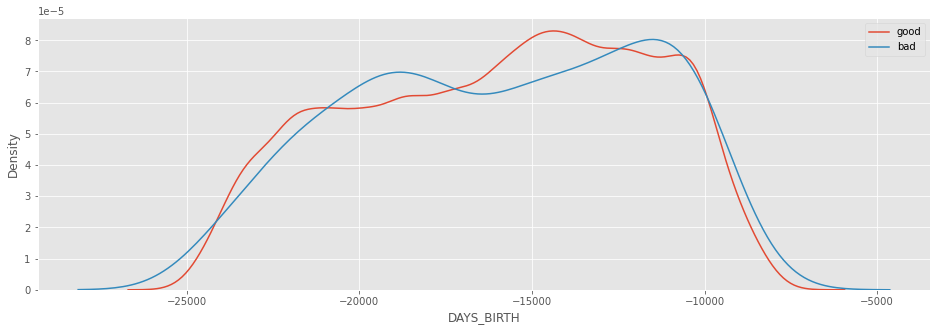

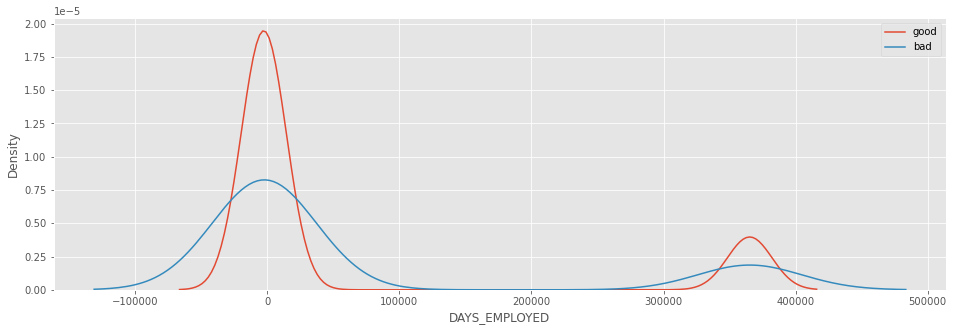

In [22]:
compare_features = ['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

for feature in compare_features:
    plt.figure(figsize=(16,5))
    fig = sns.kdeplot(data_good[feature])
    fig = sns.kdeplot(data_bad[feature])
    plt.legend(['good', 'bad'])
    plt.show()

We see that the distribution of the features is somewhat similar among the good/bad clients. This means that this features don't allow us to classify the clients by themselves.

# Data cleaning

### Drop duplicates

In [23]:
print('Datapoints in application record:', len(data)) # how many datapoints in application record?
print('Unique ID\'s in application record:',len(set(data['ID']))) # how many unique ID in application record?

Datapoints in application record: 36457
Unique ID's in application record: 36457


In [24]:
print('ID\'s duplicated: ', data['ID'].duplicated().sum())
print('Duplicated entries: ', data.duplicated().sum())

ID's duplicated:  0
Duplicated entries:  0


In [25]:
data['ID'][data['ID'].duplicated() == True]

Series([], Name: ID, dtype: int64)

In [26]:
data[data['ID'] == 7050948]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CREDIT_SCORE


The duplicates in the dataset are only ID related, although they state for a completely diferent customer profile.
We will assume that the error is in the ID's, and that they are not duplicates.  
We will then drop the ID's column as part of the data cleaning.

### Dealing with Null / Nan values

In [27]:
data.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
CREDIT_SCORE           False
dtype: bool

#### OCCUPATION_TYPE

We will try to substitute the missing values by the most common Occupation_Type related to Code_Gender and Name_Education_Type.

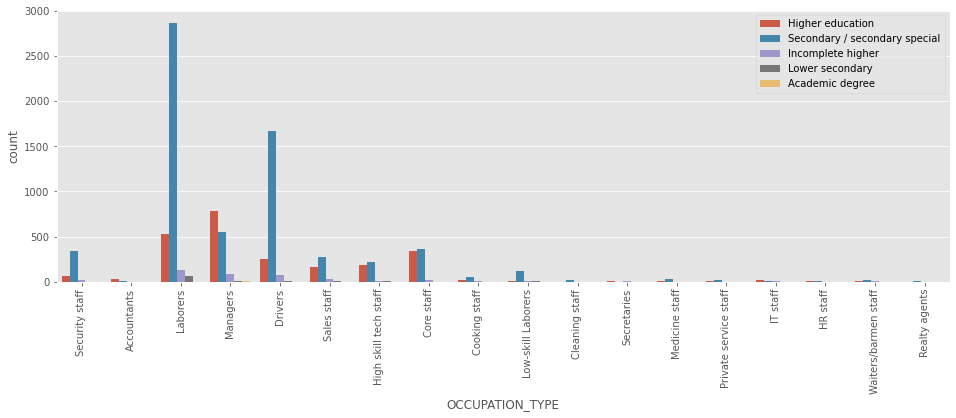

In [28]:
male_split = data[data['CODE_GENDER']=='M']

plt.figure(figsize=(16, 5))
ax=sns.countplot(x=male_split['OCCUPATION_TYPE'], hue='NAME_EDUCATION_TYPE' , data=male_split)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.show()

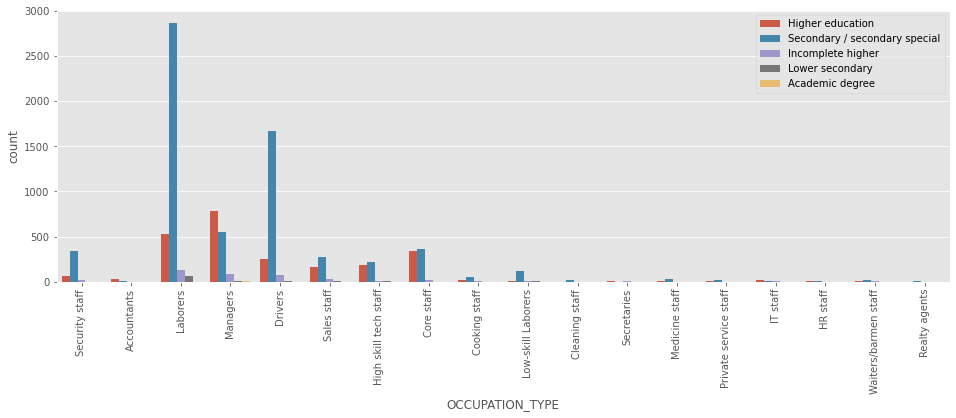

In [29]:
female_split = data[data['CODE_GENDER']=='M']

plt.figure(figsize=(16, 5))
ax=sns.countplot(x=female_split['OCCUPATION_TYPE'], hue='NAME_EDUCATION_TYPE' , data=female_split)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.show()

In [30]:
occupation_dict = {'M_Higher education': 'Managers',
 'M_Secondary / secondary special': 'Laborers',
 'M_Incomplete higher': 'Laborers',
 'M_Lower secondary': 'Laborers',
 'M_Academic degree': 'Core staff',
 'F_Higher education': 'Managers',
 'F_Secondary / secondary special': 'Laborers',
 'F_Incomplete higher': 'Laborers',
 'F_Lower secondary': 'Laborers',
 'F_Academic degree': 'Core staff'}

In [31]:
data['G_EDU'] = data['CODE_GENDER']+ '_' + data['NAME_EDUCATION_TYPE']
data.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CREDIT_SCORE,G_EDU
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,M_Higher education
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,M_Higher education
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,M_Secondary / secondary special


In [32]:
mask = (data["OCCUPATION_TYPE"].isna() == True) # selecting only NaNs from the occupation type
data["COMMON_OCCUPATION"] = data["G_EDU"].apply(lambda x: occupation_dict[x]) # new dummy column which stores the most common occupations
data.loc[mask, "OCCUPATION_TYPE"] = data.loc[mask, "COMMON_OCCUPATION"] # replace the NaN values with the values from the common occupations column

# Thanks Sabina <3


In [33]:
data.drop(['G_EDU', 'COMMON_OCCUPATION'], axis=1, inplace=True)

### Feature information

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

### Unique counts

In [35]:
unique_counts = pd.DataFrame([(col, data[col].nunique()) for col in data.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
12,FLAG_MOBIL,1
18,CREDIT_SCORE,2
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


In [36]:
object_columns = data.columns[data.dtypes =='object'].tolist() #object columns in dataset

unique_object_counts = pd.DataFrame([(col, data[object_columns][col].nunique()) for col in data[object_columns].columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

In [37]:
numeric_columns = data.columns[(data.dtypes == 'int64') | (data.dtypes == 'float64')].tolist() # numeric columns in dataset

unique_numeric_counts = pd.DataFrame([(col, data[numeric_columns][col].nunique()) for col in data[numeric_columns].columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

### Categorical features

In [38]:
unique_object_counts

,Column_Name,Num_Unique
0,CODE_GENDER,2
1,FLAG_OWN_CAR,2
2,FLAG_OWN_REALTY,2
3,NAME_INCOME_TYPE,5
4,NAME_EDUCATION_TYPE,5
5,NAME_FAMILY_STATUS,5
6,NAME_HOUSING_TYPE,6
7,OCCUPATION_TYPE,18


### Convert categorical features (binary)

#### CODE_GENDER

In [39]:
data['CODE_GENDER'].value_counts()

F    24430
M    12027
Name: CODE_GENDER, dtype: int64

In [40]:
data['CODE_GENDER'] =  data['CODE_GENDER'].replace(['F','M'],[0,1])

#### FLAG_OWN_CAR

In [41]:
data['FLAG_OWN_CAR'].value_counts()

N    22614
Y    13843
Name: FLAG_OWN_CAR, dtype: int64

In [42]:
data['FLAG_OWN_CAR'] =  data['FLAG_OWN_CAR'].replace(['Y','N'],[1,0])

#### FLAG_OWN_REALTY

In [43]:
data['FLAG_OWN_REALTY'].value_counts()

Y    24506
N    11951
Name: FLAG_OWN_REALTY, dtype: int64

In [44]:
data['FLAG_OWN_REALTY'] =  data['FLAG_OWN_REALTY'].replace(['Y','N'],[1,0])

### Convert categorical features (non-binary)

#### NAME_INCOME_TYPE

In [45]:
data['NAME_INCOME_TYPE'].value_counts()

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64

In [46]:
data.loc[data['NAME_INCOME_TYPE']=='Pensioner','NAME_INCOME_TYPE'] = 'State servant'
data.loc[data['NAME_INCOME_TYPE']=='Student','NAME_INCOME_TYPE'] = 'State servant'

In [47]:
data['NAME_INCOME_TYPE'].value_counts()

Working                 18819
State servant            9148
Commercial associate     8490
Name: NAME_INCOME_TYPE, dtype: int64

#### NAME_EDUCATION_TYPE

In [48]:
data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64

In [49]:
data.loc[(data['NAME_EDUCATION_TYPE']=='Secondary / secondary special') | (data['NAME_EDUCATION_TYPE']=='Lower secondary'),'NAME_EDUCATION_TYPE'] = 'Secondary'
data.loc[data['NAME_EDUCATION_TYPE']=='Incomplete higher', 'NAME_EDUCATION_TYPE'] = 'Higher education'

In [50]:
data['NAME_EDUCATION_TYPE'].value_counts()

Secondary           25151
Higher education    11274
Academic degree        32
Name: NAME_EDUCATION_TYPE, dtype: int64

#### NAME_FAMILY_STATUS

In [51]:
data['NAME_FAMILY_STATUS'].value_counts()

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64

In [52]:
family_status = {'Single / not married': 'Single',
                'Separated': 'Single',
                'Widow': 'Single',
                'Civil marriage': 'Married',
                'Married': 'Married'}

data['NAME_FAMILY_STATUS'] = data['NAME_FAMILY_STATUS'].map(family_status)

In [53]:
data['NAME_FAMILY_STATUS'].value_counts()

Married    27993
Single      8464
Name: NAME_FAMILY_STATUS, dtype: int64

#### NAME_HOUSING_TYPE

In [54]:
data['NAME_HOUSING_TYPE'].value_counts()

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64

#### OCCUPATION_TYPE

In [55]:
data['OCCUPATION_TYPE'].value_counts()

Laborers                 14784
Managers                  5744
Core staff                3609
Sales staff               3485
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       174
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OCCUPATION_TYPE, dtype: int64

In [56]:
data.loc[(data['OCCUPATION_TYPE']=='Cleaning staff') | (data['OCCUPATION_TYPE']=='Cooking staff') | (data['OCCUPATION_TYPE']=='Drivers') | (data['OCCUPATION_TYPE']=='Laborers') | (data['OCCUPATION_TYPE']=='Low-skill Laborers') | (data['OCCUPATION_TYPE']=='Security staff') | (data['OCCUPATION_TYPE']=='Waiters/barmen staff'), 'OCCUPATION_TYPE']= 'Laborer'
data.loc[(data['OCCUPATION_TYPE']=='Accountants') | (data['OCCUPATION_TYPE']=='Core staff') | (data['OCCUPATION_TYPE']=='HR staff') | (data['OCCUPATION_TYPE']=='Medicine staff') | (data['OCCUPATION_TYPE']=='Private service staff') | (data['OCCUPATION_TYPE']=='Realty agents') | (data['OCCUPATION_TYPE']=='Sales staff') | (data['OCCUPATION_TYPE']=='Secretaries'), 'OCCUPATION_TYPE']= 'Officer'
data.loc[(data['OCCUPATION_TYPE']=='Managers') | (data['OCCUPATION_TYPE']=='High skill tech staff') | (data['OCCUPATION_TYPE']=='IT staff'), 'OCCUPATION_TYPE']= 'High'
print(data['OCCUPATION_TYPE'].value_counts())

Laborer    19069
Officer    10201
High        7187
Name: OCCUPATION_TYPE, dtype: int64


## Numeric Features

In [57]:
unique_numeric_counts

,Column_Name,Num_Unique
5,FLAG_MOBIL,1
6,FLAG_WORK_PHONE,2
7,FLAG_PHONE,2
8,FLAG_EMAIL,2
10,CREDIT_SCORE,2
1,CNT_CHILDREN,9
9,CNT_FAM_MEMBERS,10
2,AMT_INCOME_TOTAL,265
4,DAYS_EMPLOYED,3640
3,DAYS_BIRTH,7183


#### FLAG_MOBIL

In [58]:
data['FLAG_MOBIL'].value_counts()

1    36457
Name: FLAG_MOBIL, dtype: int64

In [59]:
data.drop(['FLAG_MOBIL'], axis=1, inplace=True)

#### FLAG_WORK_PHONE

In [60]:
data['FLAG_WORK_PHONE'].value_counts()

0    28235
1     8222
Name: FLAG_WORK_PHONE, dtype: int64

In [61]:
# Ok!

#### FLAG_PHONE

In [62]:
data['FLAG_PHONE'].value_counts()

0    25709
1    10748
Name: FLAG_PHONE, dtype: int64

In [63]:
# Ok!

#### FLAG_EMAIL

In [64]:
data['FLAG_EMAIL'].value_counts()

0    33186
1     3271
Name: FLAG_EMAIL, dtype: int64

In [65]:
# Ok!

#### CNT_CHILDREN

In [66]:
data['CNT_CHILDREN'].value_counts()

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: CNT_CHILDREN, dtype: int64

In [67]:
data.loc[data['CNT_CHILDREN'] > 1,'CNT_CHILDREN'] = 2 # 2 means 2 or more

In [68]:
data['CNT_CHILDREN'].value_counts()

0    25201
1     7492
2     3764
Name: CNT_CHILDREN, dtype: int64

#### CNT_FAM_MEMBERS

In [69]:
data['CNT_FAM_MEMBERS'].value_counts()

2.0     19463
1.0      6987
3.0      6421
4.0      3106
5.0       397
6.0        58
7.0        19
15.0        3
9.0         2
20.0        1
Name: CNT_FAM_MEMBERS, dtype: int64

In [70]:
data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].astype(int)

In [71]:
data.loc[data['CNT_FAM_MEMBERS'] > 3,'CNT_FAM_MEMBERS'] = 4 # 4 means 4 or more

In [72]:
data['CNT_FAM_MEMBERS'].value_counts()

2    19463
1     6987
3     6421
4     3586
Name: CNT_FAM_MEMBERS, dtype: int64

#### AMT_INCOME_TOTAL

In [73]:
data['AMT_INCOME_TOTAL'].value_counts()

135000.0    4309
180000.0    3097
157500.0    3089
112500.0    2956
225000.0    2926
            ... 
177750.0       1
594000.0       1
164250.0       1
124200.0       1
179271.0       1
Name: AMT_INCOME_TOTAL, Length: 265, dtype: int64

(2.544, 18.18]      22460
(18.18, 33.66]      11380
(33.66, 49.14]       2099
(49.14, 64.62]        274
(64.62, 80.1]         165
(80.1, 95.58]          58
(95.58, 111.06]         4
(111.06, 126.54]        3
(126.54, 142.02]        6
(142.02, 157.5]         8
Name: AMT_INCOME_TOTAL, dtype: int64


<AxesSubplot:ylabel='Frequency'>

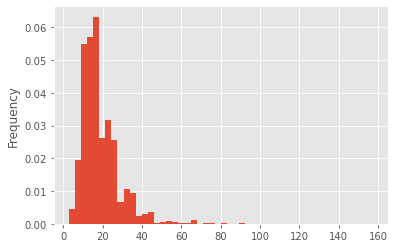

In [74]:
data['AMT_INCOME_TOTAL'] = data['AMT_INCOME_TOTAL'].astype(object)
data['AMT_INCOME_TOTAL'] = data['AMT_INCOME_TOTAL']/10000 
print(data['AMT_INCOME_TOTAL'].value_counts(bins=10, sort=False))
data['AMT_INCOME_TOTAL'].plot(kind='hist', bins=50, density=True)

In [75]:
data['AMT_INCOME_TOTAL'] = data['AMT_INCOME_TOTAL'].astype(int)
binned_income = pd.qcut(data['AMT_INCOME_TOTAL'], q=3, labels=["Low","Medium", "High"])


In [76]:
data['AMT_INCOME_TOTAL'] = binned_income

In [77]:
data['AMT_INCOME_TOTAL'].value_counts()

Low       14606
High      11161
Medium    10690
Name: AMT_INCOME_TOTAL, dtype: int64

#### DAYS_EMPLOYED 

In [78]:
# convert days into years in a new column calles "YEARS_EMPLOYED"
data["YEARS_EMPLOYED"] = round(data["DAYS_EMPLOYED"]/365.25) 

# convert negative values into positive and positive values into 0 (meaning not working)
data["YEARS_EMPLOYED"] = data["YEARS_EMPLOYED"].apply(lambda x: abs(x) if x < 0 else 0)

# drop original column
data.drop("DAYS_EMPLOYED", axis=1, inplace=True)


In [79]:
print(data["YEARS_EMPLOYED"].value_counts(bins=5, normalize=True, sort=False))

(-0.044, 8.6]    0.744356
(8.6, 17.2]      0.189977
(17.2, 25.8]     0.045753
(25.8, 34.4]     0.016458
(34.4, 43.0]     0.003456
Name: YEARS_EMPLOYED, dtype: float64


In [80]:
binned_employment = pd.cut(data['YEARS_EMPLOYED'], 5, labels=["<10","<20", "<30", "<40", "<50"])

In [81]:
data['YEARS_EMPLOYED'] = binned_employment

In [82]:
data["YEARS_EMPLOYED"].value_counts()

<10    27137
<20     6926
<30     1668
<40      600
<50      126
Name: YEARS_EMPLOYED, dtype: int64

#### DAYS_BIRTH

In [83]:
# convert days into years in a new column calles "YEARS_EMPLOYED"
data["YEARS_AGE"] = abs(round(data["DAYS_BIRTH"]/365.25))  # convert days into years

# drop original column
data.drop("DAYS_BIRTH", axis=1, inplace=True)

In [84]:
print(data["YEARS_AGE"].value_counts(bins=5, normalize=True, sort=False))

(20.951, 30.6]    0.151932
(30.6, 40.2]      0.285789
(40.2, 49.8]      0.228763
(49.8, 59.4]      0.217599
(59.4, 69.0]      0.115917
Name: YEARS_AGE, dtype: float64


In [85]:
binned_age = pd.cut(data['YEARS_AGE'], 5, labels=["20s","30s", "40s", "50s", "60s"])

In [86]:
data['YEARS_AGE'] = binned_age

In [87]:
data["YEARS_AGE"].value_counts()

30s    10419
40s     8340
50s     7933
20s     5539
60s     4226
Name: YEARS_AGE, dtype: int64

# Sort features

In [88]:
data = data[['CODE_GENDER',
            'YEARS_AGE',
            'FLAG_OWN_CAR', 
            'FLAG_OWN_REALTY', 
            'FLAG_WORK_PHONE', 
            'FLAG_PHONE', 
            'FLAG_EMAIL',
            'NAME_FAMILY_STATUS',
            'CNT_CHILDREN',
            'CNT_FAM_MEMBERS',
            'NAME_EDUCATION_TYPE',
            'NAME_INCOME_TYPE',
            'OCCUPATION_TYPE',
            'AMT_INCOME_TOTAL',
            'YEARS_EMPLOYED',
            'NAME_HOUSING_TYPE',
            'CREDIT_SCORE']]

# Cleaned dataset

In [89]:
data

,CODE_GENDER,YEARS_AGE,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,NAME_FAMILY_STATUS,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,YEARS_EMPLOYED,NAME_HOUSING_TYPE,CREDIT_SCORE
0,1,30s,1,1,1,0,0,Married,0,2,Higher education,Working,High,High,<20,Rented apartment,0
1,1,30s,1,1,1,0,0,Married,0,2,Higher education,Working,High,High,<20,Rented apartment,0
2,1,50s,1,1,0,0,0,Married,0,2,Secondary,Working,Laborer,Low,<10,House / apartment,0
3,0,50s,0,1,0,1,1,Single,0,1,Secondary,Commercial associate,Officer,High,<10,House / apartment,0
4,0,50s,0,1,0,1,1,Single,0,1,Secondary,Commercial associate,Officer,High,<10,House / apartment,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,40s,1,1,0,0,0,Married,0,2,Secondary,Working,High,High,<10,House / apartment,1
36453,0,30s,0,1,0,1,1,Married,0,2,Higher education,Commercial associate,Officer,Medium,<10,House / apartment,1
36454,0,30s,0,1,0,1,1,Married,0,2,Higher education,State servant,Officer,Medium,<10,House / apartment,1
36455,0,40s,0,1,0,0,0,Married,0,2,Secondary,Working,Officer,High,<10,House / apartment,1


In [90]:
data_good = data[data["CREDIT_SCORE"] == 0]
data_bad = data[data["CREDIT_SCORE"] == 1]

In [91]:
data_category = data.astype(str)

In [92]:
data_category.columns

Index(['CODE_GENDER', 'YEARS_AGE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'NAME_FAMILY_STATUS',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_EDUCATION_TYPE',
       'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL',
       'YEARS_EMPLOYED', 'NAME_HOUSING_TYPE', 'CREDIT_SCORE'],
      dtype='object')

In [93]:
def plot_features_variance(feature):
    data_feature = data_category.groupby('CREDIT_SCORE')[feature].value_counts(normalize=True)
    data_feature = data_feature.mul(100)
    data_feature = data_feature.rename('percent').reset_index()
    display(data_feature)

    plt.figure(figsize=(16,3))
    ax = sns.histplot(y = data_category[feature], hue=data_category['CREDIT_SCORE'], multiple="dodge", 
                      stat = 'density', shrink = 0.7, common_norm=False)
    plt.legend(title='', loc='best', labels=['Bad', 'Good'])

,CREDIT_SCORE,CODE_GENDER,percent
0,0,0,67.104712
1,0,1,32.895288
2,1,0,61.525974
3,1,1,38.474026


,CREDIT_SCORE,YEARS_AGE,percent
0,0,30s,28.623643
1,0,40s,22.912307
2,0,50s,21.723724
3,0,20s,15.136296
4,0,60s,11.604029
5,1,30s,25.974026
6,1,50s,23.863636
7,1,40s,20.779221
8,1,20s,18.506494
9,1,60s,10.876623


,CREDIT_SCORE,FLAG_OWN_CAR,percent
0,0,0,62.001618
1,0,1,37.998382
2,1,0,63.636364
3,1,1,36.363636


,CREDIT_SCORE,FLAG_OWN_REALTY,percent
0,0,1,67.355822
1,0,0,32.644178
2,1,1,59.253247
3,1,0,40.746753


,CREDIT_SCORE,FLAG_WORK_PHONE,percent
0,0,0,77.478307
1,0,1,22.521693
2,1,0,75.649351
3,1,1,24.350649


,CREDIT_SCORE,FLAG_PHONE,percent
0,0,0,70.528166
1,0,1,29.471834
2,1,0,69.967532
3,1,1,30.032468


,CREDIT_SCORE,FLAG_EMAIL,percent
0,0,0,91.018666
1,0,1,8.981334
2,1,0,91.558442
3,1,1,8.441558


,CREDIT_SCORE,NAME_FAMILY_STATUS,percent
0,0,Married,76.878435
1,0,Single,23.121565
2,1,Married,71.266234
3,1,Single,28.733766


,CREDIT_SCORE,CNT_CHILDREN,percent
0,0,0,69.110795
1,0,1,20.568623
2,0,2,10.320583
3,1,0,69.967532
4,1,1,19.480519
5,1,2,10.551948


,CREDIT_SCORE,CNT_FAM_MEMBERS,percent
0,0,2,53.430429
1,0,1,19.106610
2,0,3,17.622276
3,0,4,9.840685
4,1,2,50.811688
5,1,1,22.564935
6,1,3,17.045455
7,1,4,9.577922


,CREDIT_SCORE,NAME_EDUCATION_TYPE,percent
0,0,Secondary,69.024302
1,0,Higher education,30.886415
2,0,Academic degree,0.089283
3,1,Secondary,66.883117
4,1,Higher education,33.116883


,CREDIT_SCORE,NAME_INCOME_TYPE,percent
0,0,Working,51.653135
1,0,State servant,25.057895
2,0,Commercial associate,23.288971
3,1,Working,49.675325
4,1,State servant,27.110390
5,1,Commercial associate,23.214286


,CREDIT_SCORE,OCCUPATION_TYPE,percent
0,0,Laborer,52.266957
1,0,Officer,28.023772
2,0,High,19.709272
3,1,Laborer,54.545455
4,1,Officer,25.487013
5,1,High,19.967532


,CREDIT_SCORE,AMT_INCOME_TOTAL,percent
0,0,Low,40.032365
1,0,High,30.607405
2,0,Medium,29.360230
3,1,Low,41.883117
4,1,High,31.006494
5,1,Medium,27.110390


,CREDIT_SCORE,YEARS_EMPLOYED,percent
0,0,<10,74.328283
1,0,<20,19.064758
2,0,<30,4.598086
3,0,<40,1.660110
4,0,<50,0.348763
5,1,<10,80.681818
6,1,<20,15.097403
7,1,<30,3.246753
8,1,<40,0.811688
9,1,<50,0.162338


,CREDIT_SCORE,NAME_HOUSING_TYPE,percent
0,0,House / apartment,89.305544
1,0,With parents,4.882676
2,0,Municipal apartment,3.063531
3,0,Rented apartment,1.581987
4,0,Office apartment,0.705895
5,0,Co-op apartment,0.460367
6,1,House / apartment,87.662338
7,1,Municipal apartment,4.870130
8,1,With parents,4.220779
9,1,Office apartment,1.461039


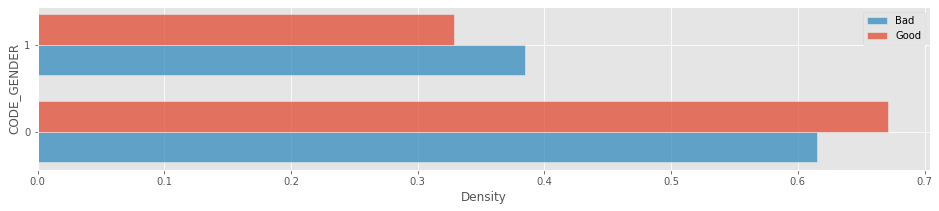

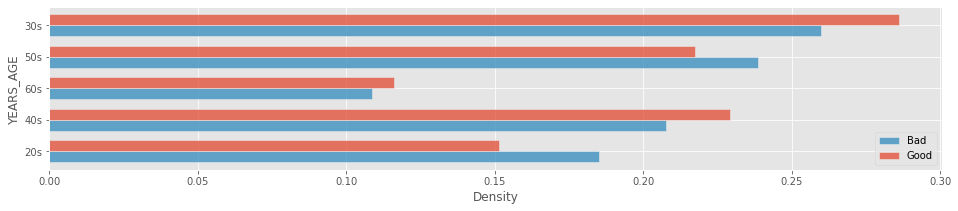

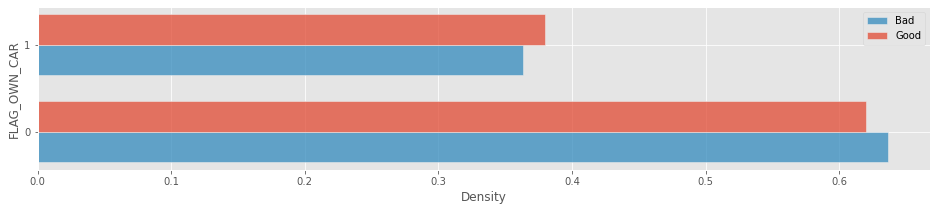

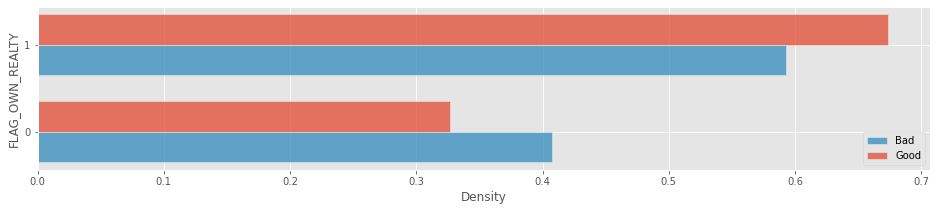

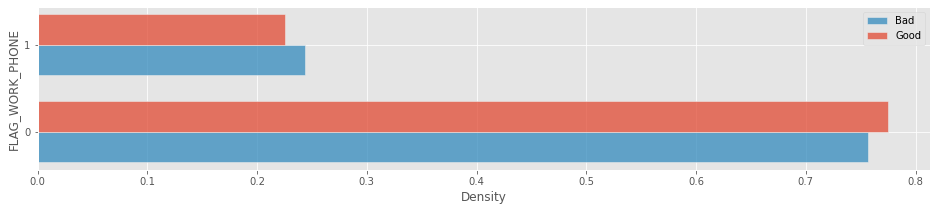

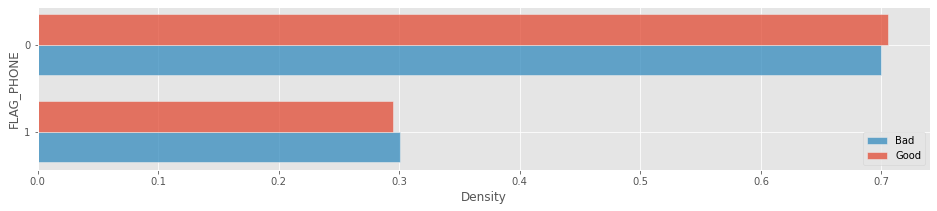

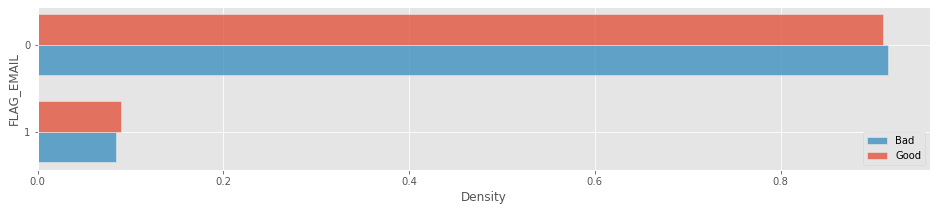

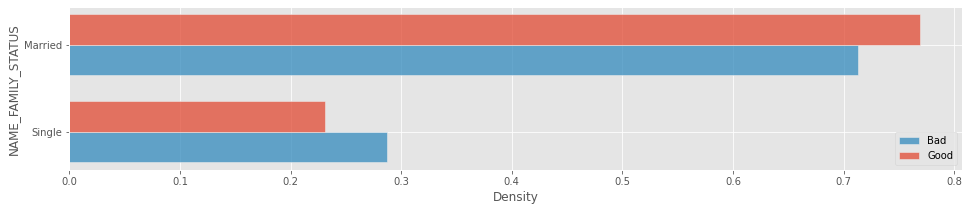

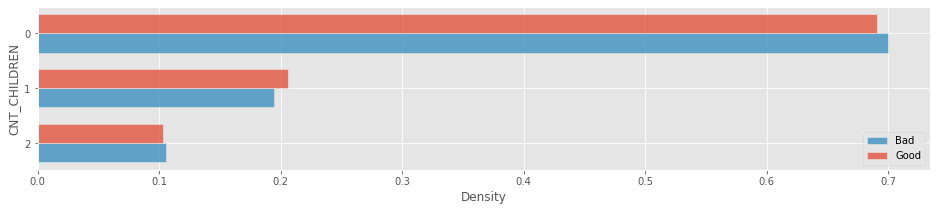

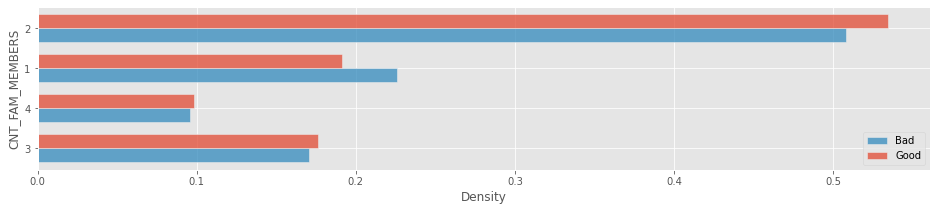

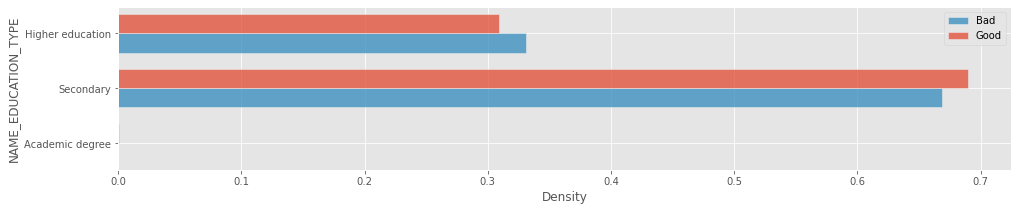

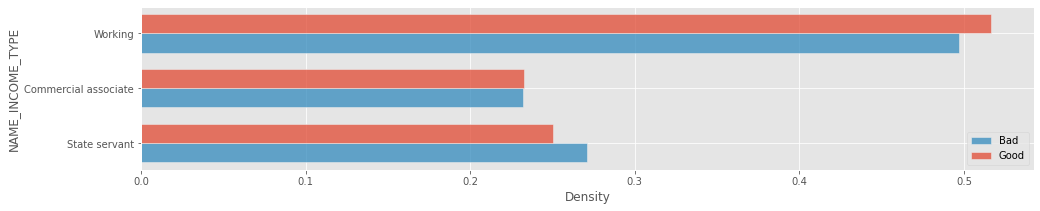

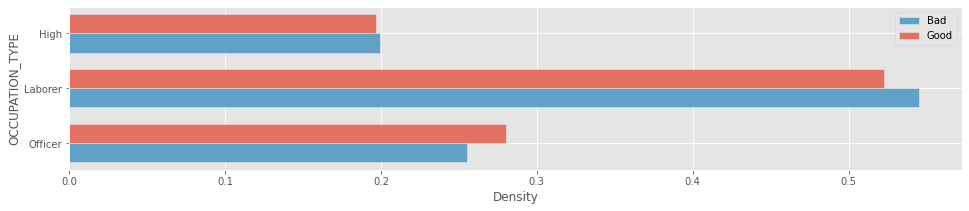

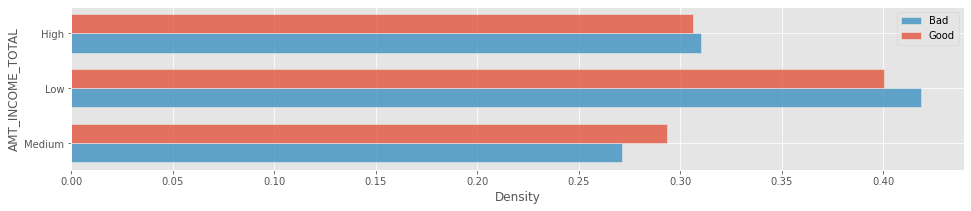

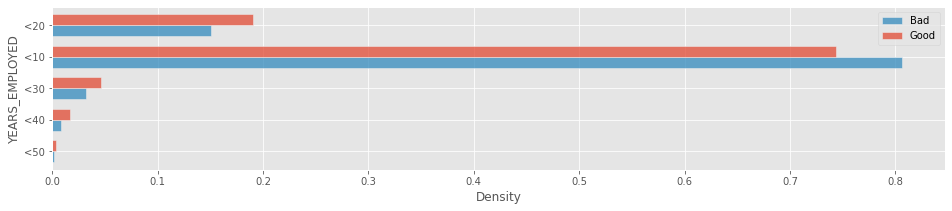

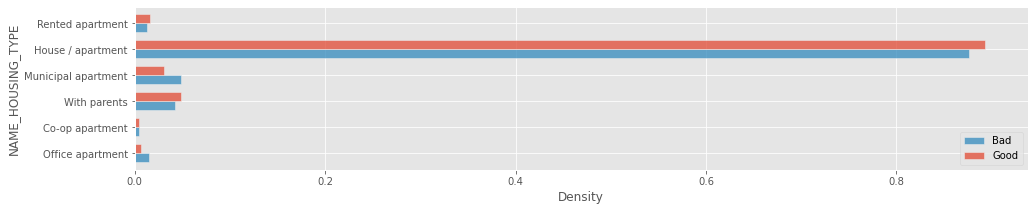

In [94]:
features_visualization = ['CODE_GENDER', 'YEARS_AGE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'NAME_FAMILY_STATUS',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_EDUCATION_TYPE',
       'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL',
       'YEARS_EMPLOYED', 'NAME_HOUSING_TYPE']

for feature in features_visualization:
    plot_features_variance(feature)

# Feature Importance: Weight of Evidence and Importance Value Scores

The Weight of Evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan.  

The formula to calculate WOE and IV is provided below.

$$ WoE = ln \left (\frac{\text{Distribution of Goods}}{\text{Distribution of Bads}} \right ) $$

$$ WoE = ln \left (\frac{\text{% of non-events}}{\text{% of events}} \right ) $$

$$ IV =  ∑ (\text{% of non-events} - \text{% of events})WoE $$


For a continuous variable, split data into parts.
- Calculate the number of events and non-events in each group (bin).
- Calculate the % of events and % of non-events in each group.
- Calculate WOE by taking natural log of division of % of non-events and % of events
Note : For a categorical variable, you do not need to split the data.

The advantages of WOE transformation are:

- Handles missing values
- Handles outliers
- The transformation is based on logarithmic value of distributions. This is aligned with the logistic regression output function
- No need for dummy variables
- By using proper binning technique, it can establish monotonic relationship (either increase or decrease) between the independent and dependent variable
- Also, IV value can be used to select variables quickly.

In [95]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    lst = []

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)
    
    iv_data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    iv_data['Share'] = iv_data['All'] / iv_data['All'].sum()
    iv_data['Bad Rate'] = iv_data['Bad'] / iv_data['All']
    iv_data['Distribution Good'] = (iv_data['All'] - iv_data['Bad']) / (iv_data['All'].sum() - iv_data['Bad'].sum())
    iv_data['Distribution Bad'] = iv_data['Bad'] / iv_data['Bad'].sum()
    iv_data['WoE'] = np.log(iv_data['Distribution Good'] / iv_data['Distribution Bad'])
    
    iv_data = iv_data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    iv_data['IV'] = iv_data['WoE'] * (iv_data['Distribution Good'] - iv_data['Distribution Bad'])

    iv_data = iv_data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    iv_data.index = range(len(iv_data.index))

    if pr:
        print(iv_data)
        print('IV = ', iv_data['IV'].sum())

    iv = iv_data['IV'].sum()
    print('This variable\'s IV is:',iv)
    print(df[feature].value_counts())
    return iv, iv_data

In [96]:
data.columns

Index(['CODE_GENDER', 'YEARS_AGE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'NAME_FAMILY_STATUS',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_EDUCATION_TYPE',
       'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL',
       'YEARS_EMPLOYED', 'NAME_HOUSING_TYPE', 'CREDIT_SCORE'],
      dtype='object')

In [97]:
# create a table to store the variables
ivtable = pd.DataFrame(data.columns, columns=['Variable'])
ivtable['IV'] = None

In [98]:
list_features = ['CODE_GENDER', 'YEARS_AGE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'NAME_FAMILY_STATUS',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_EDUCATION_TYPE',
       'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL',
       'YEARS_EMPLOYED', 'NAME_HOUSING_TYPE']

In [99]:
for feature in list_features:
    print(feature.upper())
    iv, iv_data = calc_iv(data, feature, target='CREDIT_SCORE')
    display(iv_data)
    ivtable.loc[ivtable['Variable'] == feature, 'IV'] = iv
    print('-------------------\n')

CODE_GENDER
This variable's IV is: 0.013581371667358226
0    24430
1    12027
Name: CODE_GENDER, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,CODE_GENDER,0,24430,24051,379,0.670105,0.015514,0.671047,0.61526,0.086795,0.004842
1,CODE_GENDER,1,12027,11790,237,0.329895,0.019706,0.328953,0.38474,-0.156654,0.008739


-------------------

YEARS_AGE
This variable's IV is: 0.013914537998192242
30s    10419
40s     8340
50s     7933
20s     5539
60s     4226
Name: YEARS_AGE, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,YEARS_AGE,20s,5539,5425,114,0.151932,0.020581,0.151363,0.185065,-0.201026,0.006775
1,YEARS_AGE,30s,10419,10259,160,0.285789,0.015357,0.286236,0.259740,0.097136,0.002574
2,YEARS_AGE,40s,8340,8212,128,0.228763,0.015348,0.229123,0.207792,0.097721,0.002084
3,YEARS_AGE,50s,7933,7786,147,0.217599,0.018530,0.217237,0.238636,-0.093951,0.002010
4,YEARS_AGE,60s,4226,4159,67,0.115917,0.015854,0.116040,0.108766,0.064737,0.000471


-------------------

FLAG_OWN_CAR
This variable's IV is: 0.0011443033795676962
0    22614
1    13843
Name: FLAG_OWN_CAR, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,FLAG_OWN_CAR,0,22614,22222,392,0.620292,0.017334,0.620016,0.636364,-0.026025,0.000425
1,FLAG_OWN_CAR,1,13843,13619,224,0.379708,0.016181,0.379984,0.363636,0.043974,0.000719


-------------------

FLAG_OWN_REALTY
This variable's IV is: 0.028349157710111452
1    24506
0    11951
Name: FLAG_OWN_REALTY, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,FLAG_OWN_REALTY,0,11951,11700,251,0.327811,0.021002,0.326442,0.407468,-0.221710,0.017964
1,FLAG_OWN_REALTY,1,24506,24141,365,0.672189,0.014894,0.673558,0.592532,0.128169,0.010385


-------------------

FLAG_WORK_PHONE
This variable's IV is: 0.0018649623862678076
0    28235
1     8222
Name: FLAG_WORK_PHONE, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,FLAG_WORK_PHONE,0,28235,27769,466,0.774474,0.016504,0.774783,0.756494,0.023889,0.000437
1,FLAG_WORK_PHONE,1,8222,8072,150,0.225526,0.018244,0.225217,0.243506,-0.078080,0.001428


-------------------

FLAG_PHONE
This variable's IV is: 0.0001503891689122611
0    25709
1    10748
Name: FLAG_PHONE, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,FLAG_PHONE,0,25709,25278,431,0.705187,0.016765,0.705282,0.699675,0.007981,0.000045
1,FLAG_PHONE,1,10748,10563,185,0.294813,0.017213,0.294718,0.300325,-0.018844,0.000106


-------------------

FLAG_EMAIL
This variable's IV is: 0.0003664774106978877
0    33186
1     3271
Name: FLAG_EMAIL, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,FLAG_EMAIL,0,33186,32622,564,0.910278,0.016995,0.910187,0.915584,-0.005913,0.000032
1,FLAG_EMAIL,1,3271,3219,52,0.089722,0.015897,0.089813,0.084416,0.061982,0.000335


-------------------

NAME_FAMILY_STATUS
This variable's IV is: 0.01644992469322323
Married    27993
Single      8464
Name: NAME_FAMILY_STATUS, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,NAME_FAMILY_STATUS,Married,27993,27554,439,0.767836,0.015682,0.768784,0.712662,0.075803,0.004254
1,NAME_FAMILY_STATUS,Single,8464,8287,177,0.232164,0.020912,0.231216,0.287338,-0.217307,0.012196


-------------------

CNT_CHILDREN
This variable's IV is: 0.0007482509186214081
0    25201
1     7492
2     3764
Name: CNT_CHILDREN, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,CNT_CHILDREN,0,25201,24770,431,0.691253,0.017102,0.691108,0.699675,-0.012320,0.000106
1,CNT_CHILDREN,1,7492,7372,120,0.205502,0.016017,0.205686,0.194805,0.054352,0.000591
2,CNT_CHILDREN,2,3764,3699,65,0.103245,0.017269,0.103206,0.105519,-0.022170,0.000051


-------------------

CNT_FAM_MEMBERS
This variable's IV is: 0.007332472891451859
2    19463
1     6987
3     6421
4     3586
Name: CNT_FAM_MEMBERS, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,CNT_FAM_MEMBERS,1,6987,6848,139,0.191650,0.019894,0.191066,0.225649,-0.166363,0.005753
1,CNT_FAM_MEMBERS,2,19463,19150,313,0.533862,0.016082,0.534304,0.508117,0.050254,0.001316
2,CNT_FAM_MEMBERS,3,6421,6316,105,0.176125,0.016353,0.176223,0.170455,0.033280,0.000192
3,CNT_FAM_MEMBERS,4,3586,3527,59,0.098362,0.016453,0.098407,0.095779,0.027065,0.000071


-------------------

NAME_EDUCATION_TYPE
This variable's IV is: 0.002229965135524156
Secondary           25151
Higher education    11274
Academic degree        32
Name: NAME_EDUCATION_TYPE, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,NAME_EDUCATION_TYPE,Academic degree,32,32,0,0.000878,0.000000,0.000893,0.000000,0.000000,0.000000
1,NAME_EDUCATION_TYPE,Higher education,11274,11070,204,0.309241,0.018095,0.308864,0.331169,-0.069727,0.001555
2,NAME_EDUCATION_TYPE,Secondary,25151,24739,412,0.689881,0.016381,0.690243,0.668831,0.031512,0.000675


-------------------

NAME_INCOME_TYPE
This variable's IV is: 0.002390476976897285
Working                 18819
State servant            9148
Commercial associate     8490
Name: NAME_INCOME_TYPE, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,NAME_INCOME_TYPE,Commercial associate,8490,8347,143,0.232877,0.016843,0.232890,0.232143,0.003212,0.000002
1,NAME_INCOME_TYPE,State servant,9148,8981,167,0.250926,0.018255,0.250579,0.271104,-0.078728,0.001616
2,NAME_INCOME_TYPE,Working,18819,18513,306,0.516197,0.016260,0.516531,0.496753,0.039043,0.000772


-------------------

OCCUPATION_TYPE
This variable's IV is: 0.0034128376122800584
Laborer    19069
Officer    10201
High        7187
Name: OCCUPATION_TYPE, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,OCCUPATION_TYPE,High,7187,7064,123,0.197136,0.017114,0.197093,0.199675,-0.013018,0.000034
1,OCCUPATION_TYPE,Laborer,19069,18733,336,0.523055,0.017620,0.522670,0.545455,-0.042670,0.000972
2,OCCUPATION_TYPE,Officer,10201,10044,157,0.279809,0.015391,0.280238,0.254870,0.094884,0.002407


-------------------

AMT_INCOME_TOTAL
This variable's IV is: 0.0026818022407550245
Low       14606
High      11161
Medium    10690
Name: AMT_INCOME_TOTAL, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,AMT_INCOME_TOTAL,High,11161,10970,191,0.306141,0.017113,0.306074,0.310065,-0.012955,0.000052
1,AMT_INCOME_TOTAL,Low,14606,14348,258,0.400636,0.017664,0.400324,0.418831,-0.045195,0.000836
2,AMT_INCOME_TOTAL,Medium,10690,10523,167,0.293222,0.015622,0.293602,0.271104,0.079724,0.001794


-------------------

YEARS_EMPLOYED
This variable's IV is: 0.026666559186402018
<10    27137
<20     6926
<30     1668
<40      600
<50      126
Name: YEARS_EMPLOYED, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,YEARS_EMPLOYED,<10,27137,26640,497,0.744356,0.018314,0.743283,0.806818,-0.082022,0.005211
1,YEARS_EMPLOYED,<20,6926,6833,93,0.189977,0.013428,0.190648,0.150974,0.233319,0.009257
2,YEARS_EMPLOYED,<30,1668,1648,20,0.045753,0.011990,0.045981,0.032468,0.347985,0.004702
3,YEARS_EMPLOYED,<40,600,595,5,0.016458,0.008333,0.016601,0.008117,0.715523,0.006071
4,YEARS_EMPLOYED,<50,126,125,1,0.003456,0.007937,0.003488,0.001623,0.764713,0.001426


-------------------

NAME_HOUSING_TYPE
This variable's IV is: 0.015711059499443566
House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,NAME_HOUSING_TYPE,Co-op apartment,168,165,3,0.004608,0.017857,0.004604,0.004870,-0.056268,0.000015
1,NAME_HOUSING_TYPE,House / apartment,32548,32008,540,0.892778,0.016591,0.893055,0.876623,0.018571,0.000305
2,NAME_HOUSING_TYPE,Municipal apartment,1128,1098,30,0.030941,0.026596,0.030635,0.048701,-0.463553,0.008375
3,NAME_HOUSING_TYPE,Office apartment,262,253,9,0.007187,0.034351,0.007059,0.014610,-0.727436,0.005493
4,NAME_HOUSING_TYPE,Rented apartment,575,567,8,0.015772,0.013913,0.015820,0.012987,0.197317,0.000559
5,NAME_HOUSING_TYPE,With parents,1776,1750,26,0.048715,0.014640,0.048827,0.042208,0.145674,0.000964


-------------------



### IV synthesis and Feature Selection

We will use the iv to feature selection when optimizing the models. We will follow the rule to assign predictive power to each feature:  
- less than 0.02 useless for prediction
- 0.02 to 0.10 weak predictor
- 0.10 to 0.3 medium predictor
- 0.30 to 0.5 strong predictor
- more than 0.5 too good to be true (supicious)

In [100]:
ivtable.sort_values(by='IV', ascending = False)

,Variable,IV
3,FLAG_OWN_REALTY,0.028349
14,YEARS_EMPLOYED,0.026667
7,NAME_FAMILY_STATUS,0.01645
15,NAME_HOUSING_TYPE,0.015711
1,YEARS_AGE,0.013915
0,CODE_GENDER,0.013581
9,CNT_FAM_MEMBERS,0.007332
12,OCCUPATION_TYPE,0.003413
13,AMT_INCOME_TOTAL,0.002682
11,NAME_INCOME_TYPE,0.00239


In [101]:
ivtable.drop(index=16, inplace=True)

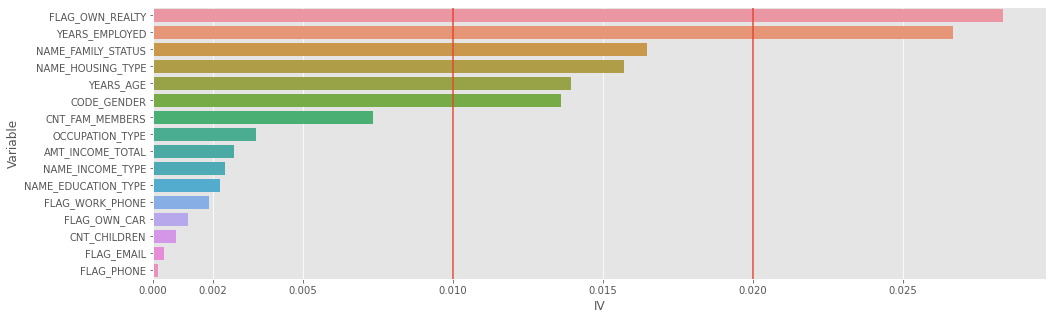

In [102]:
plt.figure(figsize=(16,5))

sns.barplot(x='IV', y='Variable', data=ivtable.sort_values(by='IV', ascending = False))

plt.axvline(x=0.01)
plt.axvline(x=0.02)
plt.xticks(ticks=[0.000, 0.002, 0.005, 0.010, 0.015, 0.020, 0.025], label=[0.000, 0.002, 0.005, 0.010, 0.015, 0.020, 0.025])
plt.show()

We will stick to the weak, medium and strong predictors, the ones with a iv higher than 0.002.

In [103]:
feature_selection = ivtable[(ivtable['IV'] > 0.02) & (ivtable['IV'] < 0.5)].sort_values(by='IV', ascending = False)
feature_selection

,Variable,IV
3,FLAG_OWN_REALTY,0.028349
14,YEARS_EMPLOYED,0.026667


In [104]:
data_iv = data[['FLAG_OWN_REALTY', 'YEARS_EMPLOYED','CREDIT_SCORE']]
data_iv

,FLAG_OWN_REALTY,YEARS_EMPLOYED,CREDIT_SCORE
0,1,<20,0
1,1,<20,0
2,1,<10,0
3,1,<10,0
4,1,<10,0
...,...,...,...
36452,1,<10,1
36453,1,<10,1
36454,1,<10,1
36455,1,<10,1


In [105]:
data_iv_2 = data[['FLAG_OWN_REALTY', 'YEARS_EMPLOYED','CREDIT_SCORE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','YEARS_AGE','CODE_GENDER']]
data_iv_2

,FLAG_OWN_REALTY,YEARS_EMPLOYED,CREDIT_SCORE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_AGE,CODE_GENDER
0,1,<20,0,Married,Rented apartment,30s,1
1,1,<20,0,Married,Rented apartment,30s,1
2,1,<10,0,Married,House / apartment,50s,1
3,1,<10,0,Single,House / apartment,50s,0
4,1,<10,0,Single,House / apartment,50s,0
...,...,...,...,...,...,...,...
36452,1,<10,1,Married,House / apartment,40s,1
36453,1,<10,1,Married,House / apartment,30s,0
36454,1,<10,1,Married,House / apartment,30s,0
36455,1,<10,1,Married,House / apartment,40s,0


# Feature Engineering

### Encoding

In [106]:
encoder = OrdinalEncoder()
features_to_encode = ['YEARS_AGE', 
                      'NAME_FAMILY_STATUS', 
                      'CNT_CHILDREN',
                      'CNT_FAM_MEMBERS', 
                      'NAME_EDUCATION_TYPE', 
                      'NAME_INCOME_TYPE',
                      'OCCUPATION_TYPE', 
                      'AMT_INCOME_TOTAL', 
                      'YEARS_EMPLOYED', 
                      'NAME_HOUSING_TYPE']

data.loc[:, features_to_encode] = encoder.fit_transform(data[features_to_encode])

features_to_encode_iv = ['YEARS_EMPLOYED']

data_iv.loc[:, features_to_encode_iv] = encoder.fit_transform(data_iv[features_to_encode_iv])

features_to_encode_iv_2 = ['FLAG_OWN_REALTY', 'YEARS_EMPLOYED','CREDIT_SCORE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','YEARS_AGE','CODE_GENDER']

data_iv_2.loc[:, features_to_encode_iv_2] = encoder.fit_transform(data_iv_2[features_to_encode_iv_2])

# Data ready for modelling

#### DATA WITHOUT FEATURE SELECTION

In [107]:
data

,CODE_GENDER,YEARS_AGE,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,NAME_FAMILY_STATUS,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,AMT_INCOME_TOTAL,YEARS_EMPLOYED,NAME_HOUSING_TYPE,CREDIT_SCORE
0,1,1.0,1,1,1,0,0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,4.0,0
1,1,1.0,1,1,1,0,0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,4.0,0
2,1,3.0,1,1,0,0,0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0
3,0,3.0,0,1,0,1,1,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0
4,0,3.0,0,1,0,1,1,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,2.0,1,1,0,0,0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1
36453,0,1.0,0,1,0,1,1,0.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1
36454,0,1.0,0,1,0,1,1,0.0,0.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,1
36455,0,2.0,0,1,0,0,0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,1


#### DATA WITH FEATURE SELECTION

In [108]:
data_iv

,FLAG_OWN_REALTY,YEARS_EMPLOYED,CREDIT_SCORE
0,1,1.0,0
1,1,1.0,0
2,1,0.0,0
3,1,0.0,0
4,1,0.0,0
...,...,...,...
36452,1,0.0,1
36453,1,0.0,1
36454,1,0.0,1
36455,1,0.0,1


In [109]:
data_iv_2

,FLAG_OWN_REALTY,YEARS_EMPLOYED,CREDIT_SCORE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_AGE,CODE_GENDER
0,1.0,1.0,0.0,0.0,4.0,1.0,1.0
1,1.0,1.0,0.0,0.0,4.0,1.0,1.0
2,1.0,0.0,0.0,0.0,1.0,3.0,1.0
3,1.0,0.0,0.0,1.0,1.0,3.0,0.0
4,1.0,0.0,0.0,1.0,1.0,3.0,0.0
...,...,...,...,...,...,...,...
36452,1.0,0.0,1.0,0.0,1.0,2.0,1.0
36453,1.0,0.0,1.0,0.0,1.0,1.0,0.0
36454,1.0,0.0,1.0,0.0,1.0,1.0,0.0
36455,1.0,0.0,1.0,0.0,1.0,2.0,0.0


# 3. CLASSIFIERS MODELS

### Target Selection

In [110]:
X = data.drop("CREDIT_SCORE", axis=1)
y = data.CREDIT_SCORE

# Functions

### Scalers

In [111]:
scalers = [StandardScaler(), MinMaxScaler(), PolynomialFeatures(degree=2, interaction_only=True), RobustScaler()] # Prepared for a for loop

def model_inplace(scaler, model, X_train, X_test, y_train, y_test):
    X_train_model = scaler.fit_transform(X_train)
    X_test_model = scaler.transform(X_test)
    model.fit(X_train_model, y_train)
    pred_train = model.predict(X_train_model)
    pred_test = model.predict(X_test_model)
    print(scaler)
    print('score on train set:', model.score(X_train_model, y_train))
    print('score on test set', model.score(X_test_model, y_test))
    print(classification_report(y_test, pred_test))
    print(classification_report(y_train, pred_train))

### Model testing

In [112]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(n_estimators=250,max_depth=12,min_samples_leaf=16)}

def model_tester(scaler, classifier, X_train, X_test, y_train, y_test):
    result_table = pd.DataFrame(columns=['classifiers','accuracy','presicion','recall','f1_score','fpr','tpr','auc'])

    y_test = y_test.astype(int)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    for key, classifier in classifiers.items():

        classifier.fit(X_train, y_train)
        y_predict = classifier.predict(X_test)

        yproba = classifier.predict_proba(X_test)[::,1]

        fpr, tpr, _ = roc_curve(y_test,  yproba)
        auc = roc_auc_score(y_test, yproba)
  
        cm = confusion_matrix(y_test, y_predict)

        cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Good', 'Bad'])

        cm_display.plot()
        plt.show()
        
        result_table = result_table.append({'classifiers':key,
                                            'accuracy':accuracy_score(y_test, y_predict),
                                            'presicion':precision_score(y_test, y_predict, average='weighted'),
                                            'recall':recall_score(y_test, y_predict, average='weighted'),
                                            'f1_score':f1_score(y_test, y_predict, average='weighted'),
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc
                                             }, ignore_index=True)
        print(classifier)
        print('score on train set:', classifier.score(X_train, y_train))
        print('score on test set', classifier.score(X_test, y_test))

    result_table.set_index('classifiers', inplace=True)   
        
    display(result_table.iloc[:,:4])
    
    fig = plt.figure(figsize=(8,6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                 result_table.loc[i]['tpr'], 
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
        
    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate")
    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate")
    plt.legend(prop={'size':13}, loc='lower right')

    plt.show()
    

### Hyperparameter testing

In [113]:
def try_model(scaler, model, X_train, X_test, y_train, y_test):    
    model.fit(X_train_balance, y_train_balance)
    y_predict = model.predict(X_test_balance)

    yproba = model.predict_proba(X_test_balance)[::,1]

    fpr, tpr, _ = roc_curve(y_test_balance,  yproba)
    auc = roc_auc_score(y_test_balance, yproba)

    cm = confusion_matrix(y_test_balance, y_predict)

    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Good', 'Bad'])

    cm_display.plot()
    plt.show()

    print('score on train set:', model.score(X_train_balance, y_train_balance))
    print('score on test set', model.score(X_test_balance, y_test_balance))

### Regularisation

In [114]:
def model_regularization(scaler, model, X_train, X_test, y_train, y_test):
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('score on train set:', model.score(X_train, y_train))
    print('score on test set', model.score(X_test, y_test))


# Cheching data

In [115]:
y.value_counts(normalize=True)

0    0.983103
1    0.016897
Name: CREDIT_SCORE, dtype: float64

In [116]:
y.value_counts()

0    35841
1      616
Name: CREDIT_SCORE, dtype: int64

# Model: Unbalanced data

### Train-test split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    stratify=y, test_size=0.3,
                                                    random_state = 10086)

### Run Model

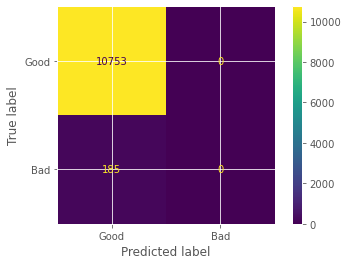

LogisticRegression()
score on train set: 0.983110623457032
score on test set 0.9830864874748583


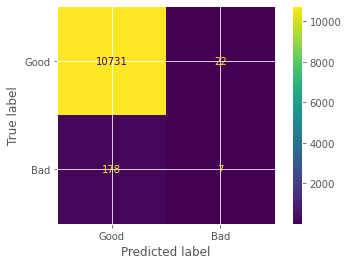

KNeighborsClassifier()
score on train set: 0.9841686586464987
score on test set 0.9817151215944414


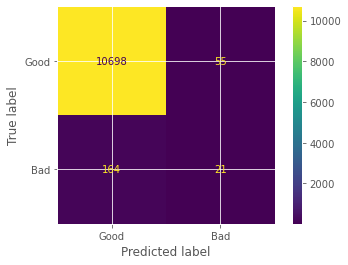

DecisionTreeClassifier()
score on train set: 0.9883616129158667
score on test set 0.9799780581459133


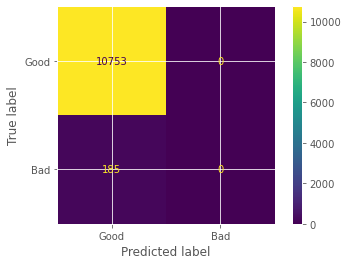

RandomForestClassifier(max_depth=12, min_samples_leaf=16, n_estimators=250)
score on train set: 0.983110623457032
score on test set 0.9830864874748583


,accuracy,presicion,recall,f1_score
classifiers,,,,
LogisticRegression,0.983086,0.966459,0.983086,0.974702
KNeighbors,0.981715,0.971128,0.981715,0.975116
DecisionTree,0.979978,0.972917,0.979978,0.975848
RandomForest,0.983086,0.966459,0.983086,0.974702


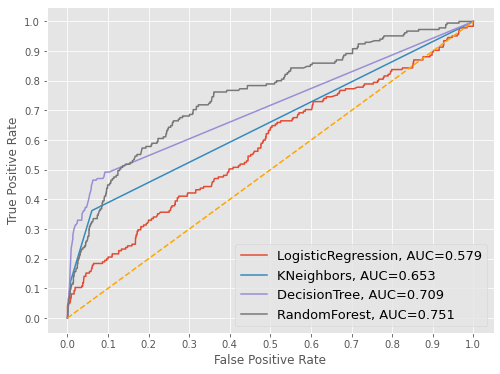

In [118]:
y_train = np.float64(y_train)
model_tester(StandardScaler(), classifiers, X_train, X_test, y_train, y_test)

# Model: SMOTE balanced data

### SMOTE oversamplig

In [119]:
sm = SMOTE(k_neighbors = 3)

X_balance, y_balance = sm.fit_resample(X_train, y_train)

### Train-test split

In [120]:
X_train_balance, X_test_balance, y_train_balance, y_test_balance = train_test_split(X_balance, y_balance, random_state=0) # default 20% test size


In [121]:
y_train_balance = pd.Series(y_train_balance)
y_train_balance.value_counts(normalize=True)

1.0    0.50085
0.0    0.49915
dtype: float64

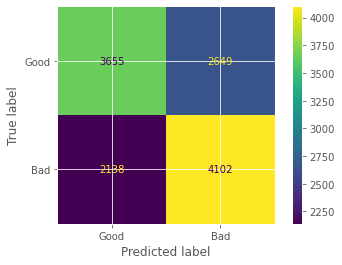

LogisticRegression()
score on train set: 0.6192602040816326
score on test set 0.6183832908163265


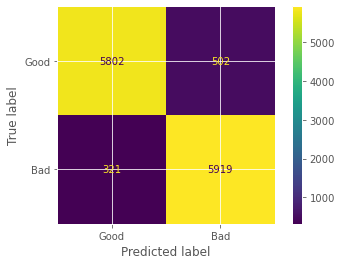

KNeighborsClassifier()
score on train set: 0.9491656037414966
score on test set 0.9343909438775511


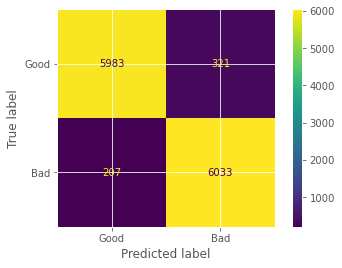

DecisionTreeClassifier()
score on train set: 0.9677667942176871
score on test set 0.9579081632653061


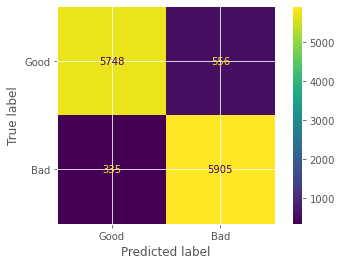

RandomForestClassifier(max_depth=12, min_samples_leaf=16, n_estimators=250)
score on train set: 0.9356398809523809
score on test set 0.9289700255102041


,accuracy,presicion,recall,f1_score
classifiers,,,,
LogisticRegression,0.618383,0.619333,0.618383,0.617829
KNeighbors,0.934391,0.934763,0.934391,0.934382
DecisionTree,0.957908,0.958063,0.957908,0.957907
RandomForest,0.92897,0.929516,0.92897,0.928954


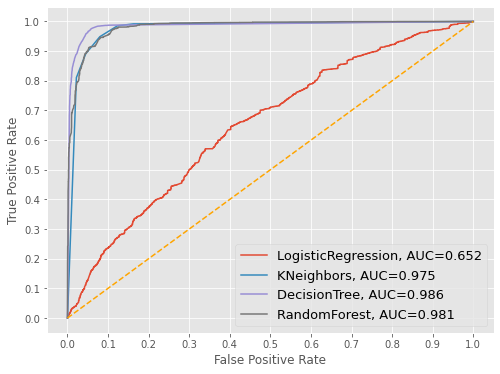

In [122]:
y_train_balance = np.float64(y_train_balance)
model_tester(StandardScaler(), classifiers, X_train_balance, X_test_balance, y_train_balance, y_test_balance)

### Confidence Intervals

In [123]:
confidence = 0.95  # Change to your desired confidence level
z_value = scipy.stats.norm.ppf((1 + confidence) / 2.0)
print(z_value)

1.959963984540054


In [124]:
model=LogisticRegression()

In [125]:
model.fit(X_train_balance, y_train_balance)

# calculate the accuracy of the model
acc_test = model.score(X_test_balance, y_test_balance)

# calculate the interval:
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

results = {
    "Model: Logistic Regression": {
        "Test accuracy": acc_test,
        "Lower 95% CI": ci_lower,
        "Upper 95% CI": ci_upper,
    }
}


In [126]:
model=KNeighborsClassifier()

In [127]:
model.fit(X_train_balance, y_train_balance)

# calculate the accuracy of the model
acc_test = model.score(X_test_balance, y_test_balance)

# calculate the interval:
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

results["Model: KN Neighbors"] = {
    "Test accuracy": acc_test,
    "Lower 95% CI": ci_lower,
    "Upper 95% CI": ci_upper,
}


In [128]:
model=DecisionTreeClassifier()

In [129]:
model.fit(X_train_balance, y_train_balance)

# calculate the accuracy of the model
acc_test = model.score(X_test_balance, y_test_balance)

# calculate the interval:
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

results["Model: Decision Tree"] = {
    "Test accuracy": acc_test,
    "Lower 95% CI": ci_lower,
    "Upper 95% CI": ci_upper,
}


In [130]:
model=RandomForestClassifier(n_estimators=250,max_depth=12,min_samples_leaf=16)

In [131]:
model.fit(X_train_balance, y_train_balance)

# calculate the accuracy of the model
acc_test = model.score(X_test_balance, y_test_balance)

# calculate the interval:
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

results["Model: Random Forest"] = {
    "Test accuracy": acc_test,
    "Lower 95% CI": ci_lower,
    "Upper 95% CI": ci_upper,
}


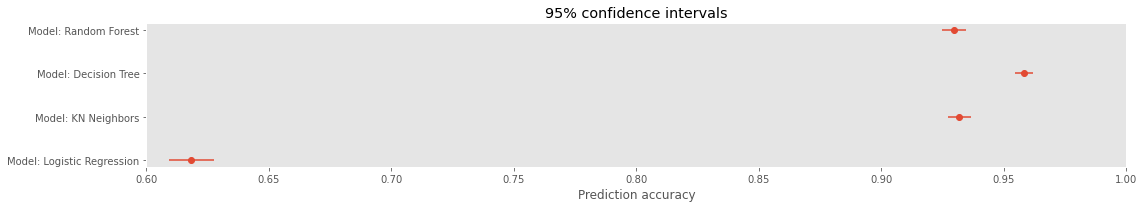

In [132]:
labels = list(results.keys())

means = np.array([results[k]["Test accuracy"] for k in labels])
lower_error = np.array([results[k]["Lower 95% CI"] for k in labels])
upper_error = np.array([results[k]["Upper 95% CI"] for k in labels])

asymmetric_error = [means - lower_error, upper_error - means]

fig, ax = plt.subplots(figsize=(16, 3))
ax.errorbar(means, np.arange(len(means)), xerr=asymmetric_error, fmt="o")
ax.set_xlim([0.60, 1.0])
ax.set_yticks(np.arange(len(means)))
ax.set_yticklabels(labels)
ax.set_xlabel("Prediction accuracy")
ax.set_title("95% confidence intervals")

plt.grid()
plt.tight_layout()
plt.show()

In [133]:
results = pd.DataFrame(results)
results

,Model: Logistic Regression,Model: KN Neighbors,Model: Decision Tree,Model: Random Forest
Test accuracy,0.618383,0.931840,0.958307,0.929528
Lower 95% CI,0.609280,0.927117,0.954561,0.924732
Upper 95% CI,0.627487,0.936563,0.962053,0.934324


# Model: Scale the data

### Scaling testing

In [134]:
for i in scalers:
    model_inplace(i, LogisticRegression(), X_train_balance, X_test_balance, y_train_balance, y_test_balance)

StandardScaler()
score on train set: 0.6192602040816326
score on test set 0.6183832908163265
              precision    recall  f1-score   support

         0.0       0.63      0.58      0.60      6304
         1.0       0.61      0.66      0.63      6240

    accuracy                           0.62     12544
   macro avg       0.62      0.62      0.62     12544
weighted avg       0.62      0.62      0.62     12544

              precision    recall  f1-score   support

         0.0       0.63      0.58      0.60     18784
         1.0       0.61      0.66      0.63     18848

    accuracy                           0.62     37632
   macro avg       0.62      0.62      0.62     37632
weighted avg       0.62      0.62      0.62     37632

MinMaxScaler()
score on train set: 0.6193399234693877
score on test set 0.6184630102040817
              precision    recall  f1-score   support

         0.0       0.63      0.58      0.60      6304
         1.0       0.61      0.66      0.63      6240

CONCLUSION: We choose the Polynomial Scaler which has scored better on the f1-score value

### Run Model

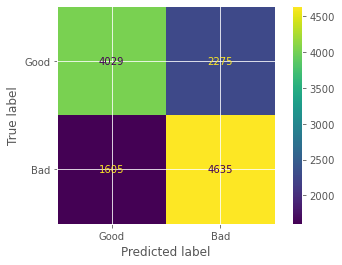

LogisticRegression()
score on train set: 0.6920174319727891
score on test set 0.6906887755102041


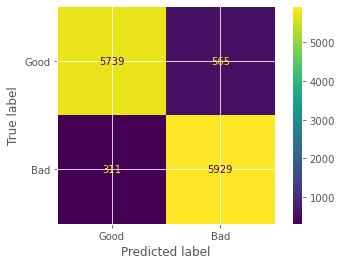

KNeighborsClassifier()
score on train set: 0.9468271683673469
score on test set 0.9301658163265306


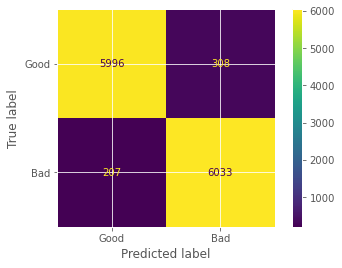

DecisionTreeClassifier()
score on train set: 0.9677667942176871
score on test set 0.9589445153061225


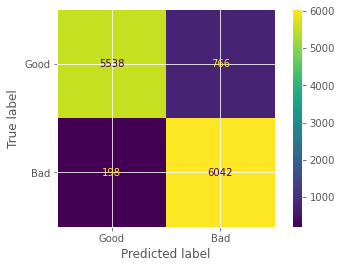

RandomForestClassifier(max_depth=12, min_samples_leaf=16, n_estimators=250)
score on train set: 0.92703018707483
score on test set 0.9231505102040817


,accuracy,presicion,recall,f1_score
classifiers,,,,
LogisticRegression,0.690689,0.693058,0.690689,0.689889
KNeighbors,0.930166,0.930887,0.930166,0.930144
DecisionTree,0.958945,0.959067,0.958945,0.958944
RandomForest,0.923151,0.926682,0.923151,0.92301


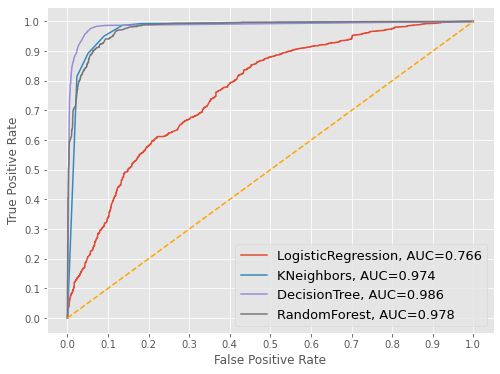

In [135]:
model_tester(PolynomialFeatures(degree=2, interaction_only=True), classifiers, X_train_balance, X_test_balance, y_train_balance, y_test_balance)


### Confidence Intervals

In [136]:
poly_scaler = PolynomialFeatures(degree=2, interaction_only=True)
X_train_balance_poly = poly_scaler.fit_transform(X_train_balance)
X_test_balance_poly = poly_scaler.transform(X_test_balance)


In [137]:
confidence = 0.95  # Change to your desired confidence level
z_value = scipy.stats.norm.ppf((1 + confidence) / 2.0)
print(z_value)

1.959963984540054


In [138]:
model=LogisticRegression()

In [139]:
model.fit(X_train_balance_poly, y_train_balance)

# calculate the accuracy of the model
acc_test = model.score(X_test_balance_poly, y_test_balance)

# calculate the interval:
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

results = {
    "Model: Logistic Regression": {
        "Test accuracy": acc_test,
        "Lower 95% CI": ci_lower,
        "Upper 95% CI": ci_upper,
    }
}


In [140]:
model=KNeighborsClassifier()

In [141]:
model.fit(X_train_balance_poly, y_train_balance)

# calculate the accuracy of the model
acc_test = model.score(X_test_balance_poly, y_test_balance)

# calculate the interval:
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

results["Model: KN Neighbors"] = {
    "Test accuracy": acc_test,
    "Lower 95% CI": ci_lower,
    "Upper 95% CI": ci_upper,
}


In [142]:
model=DecisionTreeClassifier()

In [143]:
model.fit(X_train_balance_poly, y_train_balance)

# calculate the accuracy of the model
acc_test = model.score(X_test_balance_poly, y_test_balance)

# calculate the interval:
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

results["Model: Decision Tree"] = {
    "Test accuracy": acc_test,
    "Lower 95% CI": ci_lower,
    "Upper 95% CI": ci_upper,
}


In [144]:
model=RandomForestClassifier(n_estimators=250,max_depth=12,min_samples_leaf=16)

In [145]:
model.fit(X_train_balance_poly, y_train_balance)

# calculate the accuracy of the model
acc_test = model.score(X_test_balance_poly, y_test_balance)

# calculate the interval:
ci_length = z_value * np.sqrt((acc_test * (1 - acc_test)) / y_test.shape[0])

ci_lower = acc_test - ci_length
ci_upper = acc_test + ci_length

results["Model: Random Forest"] = {
    "Test accuracy": acc_test,
    "Lower 95% CI": ci_lower,
    "Upper 95% CI": ci_upper,
}


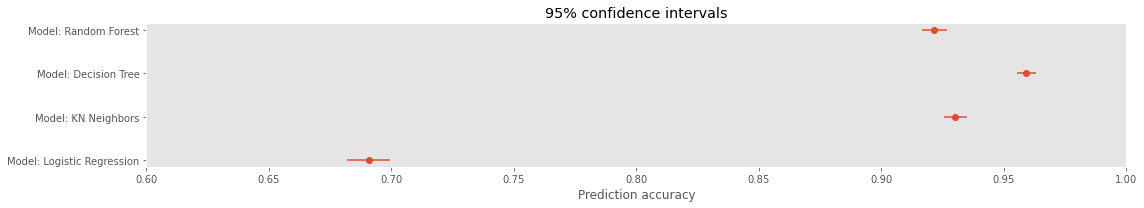

In [146]:
labels = list(results.keys())

means = np.array([results[k]["Test accuracy"] for k in labels])
lower_error = np.array([results[k]["Lower 95% CI"] for k in labels])
upper_error = np.array([results[k]["Upper 95% CI"] for k in labels])

asymmetric_error = [means - lower_error, upper_error - means]

fig, ax = plt.subplots(figsize=(16, 3))
ax.errorbar(means, np.arange(len(means)), xerr=asymmetric_error, fmt="o")
ax.set_xlim([0.60, 1.0])
ax.set_yticks(np.arange(len(means)))
ax.set_yticklabels(labels)
ax.set_xlabel("Prediction accuracy")
ax.set_title("95% confidence intervals")

plt.grid()
plt.tight_layout()
plt.show()

In [147]:
results = pd.DataFrame(results)
results

,Model: Logistic Regression,Model: KN Neighbors,Model: Decision Tree,Model: Random Forest
Test accuracy,0.690689,0.930166,0.959184,0.921556
Lower 95% CI,0.682027,0.925389,0.955476,0.916517
Upper 95% CI,0.699351,0.934942,0.962892,0.926595


# Model: Feature selection

### Feature selection (IV > 0.02)

In [148]:
data_iv.head()

,FLAG_OWN_REALTY,YEARS_EMPLOYED,CREDIT_SCORE
0,1,1.0,0
1,1,1.0,0
2,1,0.0,0
3,1,0.0,0
4,1,0.0,0


### X-y split

In [149]:
X_iv = data_iv.drop("CREDIT_SCORE", axis=1)
y_iv = data_iv.CREDIT_SCORE

### SMOTE Oversampling

In [150]:
y_iv = y_iv.astype('int')
X_balance_iv,y_balance_iv = SMOTE().fit_resample(X_iv,y_iv)
X_balance_iv = pd.DataFrame(X_balance_iv, columns = X_iv.columns)

### Train-test split

In [151]:
X_train_balance_iv, X_test_balance_iv, y_train_balance_iv, y_test_balance_iv = train_test_split(X_balance_iv,y_balance_iv, 
                                                    stratify=y_balance_iv, test_size=0.3,
                                                    random_state = 10086)

### Running model

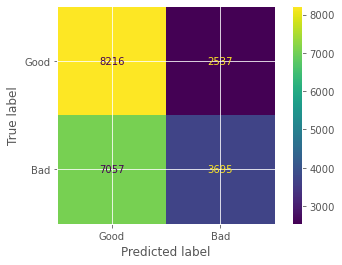

LogisticRegression()
score on train set: 0.5519660402176296
score on test set 0.553871192745873


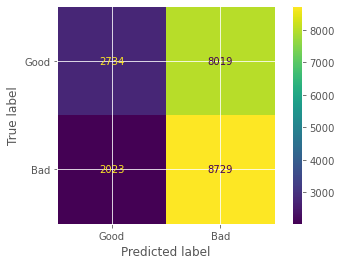

KNeighborsClassifier()
score on train set: 0.5342089004922574
score on test set 0.5330388281794931


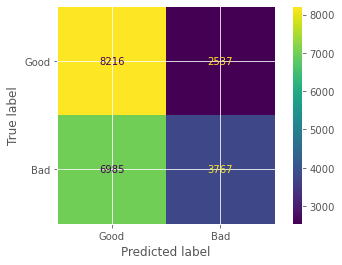

DecisionTreeClassifier()
score on train set: 0.5552743288757798
score on test set 0.5572192513368984


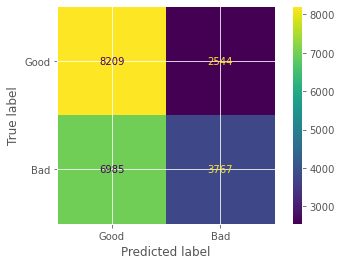

RandomForestClassifier(max_depth=12, min_samples_leaf=16, n_estimators=250)
score on train set: 0.555035175478805
score on test set 0.5568937456405487


,accuracy,presicion,recall,f1_score
classifiers,,,,
LogisticRegression,0.553871,0.565424,0.553871,0.533247
KNeighbors,0.533039,0.547966,0.533039,0.493685
DecisionTree,0.557219,0.569023,0.557219,0.537425
RandomForest,0.556894,0.568585,0.556894,0.53715


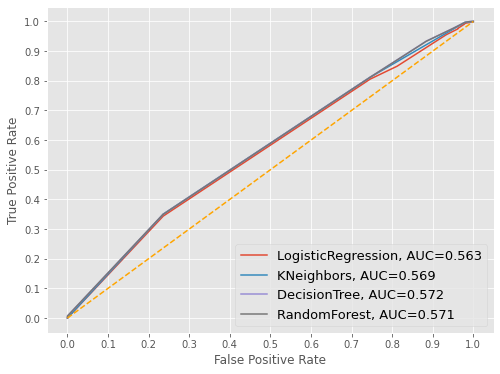

In [152]:
model_tester(PolynomialFeatures(degree=2, interaction_only=True), classifiers, X_train_balance_iv, X_test_balance_iv, y_train_balance_iv, y_test_balance_iv)


### Feature Selection (IV > 0.01)

In [153]:
data_iv_2.head()

,FLAG_OWN_REALTY,YEARS_EMPLOYED,CREDIT_SCORE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_AGE,CODE_GENDER
0,1.0,1.0,0.0,0.0,4.0,1.0,1.0
1,1.0,1.0,0.0,0.0,4.0,1.0,1.0
2,1.0,0.0,0.0,0.0,1.0,3.0,1.0
3,1.0,0.0,0.0,1.0,1.0,3.0,0.0
4,1.0,0.0,0.0,1.0,1.0,3.0,0.0


### X-y split

In [154]:
X_iv2 = data_iv_2.drop("CREDIT_SCORE", axis=1)
y_iv2 = data_iv_2.CREDIT_SCORE

### SMOTE Oversampling

In [155]:
y_iv2 = y_iv2.astype('int')
X_balance_iv2,y_balance_iv2 = SMOTE().fit_resample(X_iv2,y_iv2)
X_balance_iv2 = pd.DataFrame(X_balance_iv2, columns = X_iv2.columns)

### Train-test split

In [156]:
X_train_balance_iv2, X_test_balance_iv2, y_train_balance_iv2, y_test_balance_iv2 = train_test_split(X_balance_iv2,y_balance_iv2, 
                                                    stratify=y_balance_iv2, test_size=0.3,
                                                    random_state = 10086)

### Run model

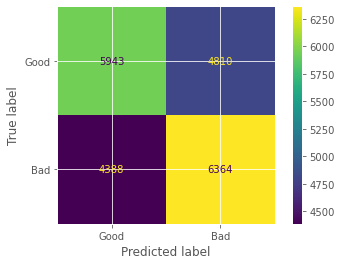

LogisticRegression()
score on train set: 0.5762002511110669
score on test set 0.5722855149965125


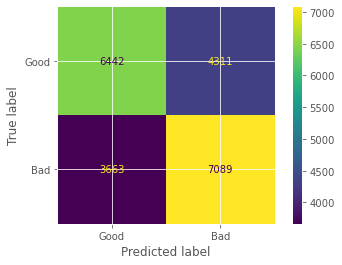

KNeighborsClassifier()
score on train set: 0.6292723757897044
score on test set 0.6292025110439433


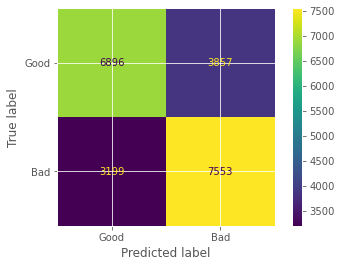

DecisionTreeClassifier()
score on train set: 0.6753891225063277
score on test set 0.6718902580795164


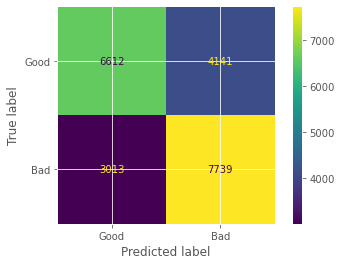

RandomForestClassifier(max_depth=12, min_samples_leaf=16, n_estimators=250)
score on train set: 0.6688124040895231
score on test set 0.6673331783306208


,accuracy,presicion,recall,f1_score
classifiers,,,,
LogisticRegression,0.572286,0.572398,0.572286,0.572121
KNeighbors,0.629203,0.629675,0.629203,0.628866
DecisionTree,0.67189,0.672537,0.67189,0.671583
RandomForest,0.667333,0.669197,0.667333,0.666416


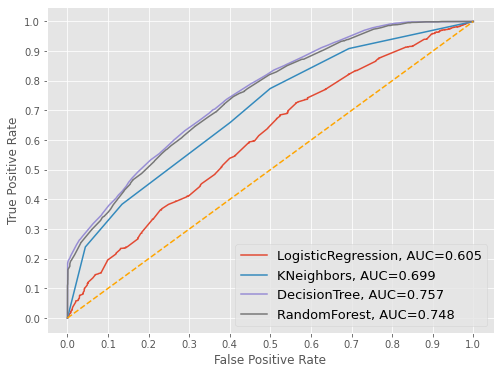

In [157]:
model_tester(PolynomialFeatures(degree=2, interaction_only=True), classifiers, X_train_balance_iv2, X_test_balance_iv2, y_train_balance_iv2, y_test_balance_iv2)

# Hypertunning

In [158]:
scaler = RobustScaler()
X_train_balance = scaler.fit_transform(X_train_balance)
X_test_balance = scaler.transform(X_test_balance)

### Saga

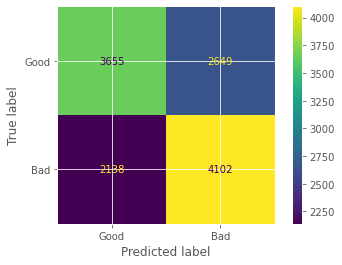

score on train set: 0.6192602040816326
score on test set 0.6183832908163265


In [159]:
model = LogisticRegression(random_state = 50, solver='saga')

try_model(scaler, model, X_train, X_test, y_train, y_test)

### Multi-class

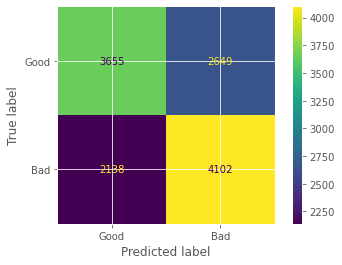

score on train set: 0.6192867772108843
score on test set 0.6183832908163265


In [160]:
model=LogisticRegression(multi_class='ovr')

try_model(scaler, model, X_train, X_test, y_train, y_test)


# Regularization

In [161]:
ridge = Ridge(alpha=400) 
lasso = Lasso(alpha=0.1) 

In [162]:
model_regularization(RobustScaler(), ridge, X_train_balance, X_test_balance, y_train_balance, y_test_balance)

score on train set: 0.06888285572736863
score on test set 0.06914482540019029


# Test model K-Folds

In [163]:
 # create the dataset
def get_dataset(n_samples=100):
    X_train_balance, y_train_balance = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    return X_train_balance, y_train_balance
 
# retrieve the model to be evaluate
def get_model():
    model = LogisticRegression()
    return model
 
# evaluate the model using a given test condition
def evaluate_model(cv):
    # get the dataset
    X_train_balance, y_train_balance = get_dataset()
    # get the model
    model = get_model()
    # evaluate the model
    scores = cross_val_score(model, X_train_balance, y_train_balance, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return np.mean(scores), scores.min(), scores.max()
 

Ideal: 0.840
> folds=2, accuracy=0.740 (0.700,0.780)
> folds=3, accuracy=0.749 (0.697,0.824)
> folds=4, accuracy=0.790 (0.640,0.920)
> folds=5, accuracy=0.810 (0.600,0.950)
> folds=6, accuracy=0.820 (0.688,0.941)
> folds=7, accuracy=0.799 (0.571,1.000)
> folds=8, accuracy=0.811 (0.385,0.923)
> folds=9, accuracy=0.829 (0.636,1.000)
> folds=10, accuracy=0.850 (0.600,1.000)
> folds=11, accuracy=0.829 (0.667,1.000)
> folds=12, accuracy=0.785 (0.250,1.000)
> folds=13, accuracy=0.839 (0.571,1.000)
> folds=14, accuracy=0.807 (0.429,1.000)
> folds=15, accuracy=0.821 (0.571,1.000)
> folds=16, accuracy=0.827 (0.500,1.000)
> folds=17, accuracy=0.816 (0.600,1.000)
> folds=18, accuracy=0.831 (0.600,1.000)
> folds=19, accuracy=0.826 (0.600,1.000)
> folds=20, accuracy=0.830 (0.600,1.000)
> folds=21, accuracy=0.814 (0.500,1.000)
> folds=22, accuracy=0.820 (0.500,1.000)
> folds=23, accuracy=0.802 (0.250,1.000)
> folds=24, accuracy=0.804 (0.250,1.000)
> folds=25, accuracy=0.810 (0.250,1.000)
> folds=26,

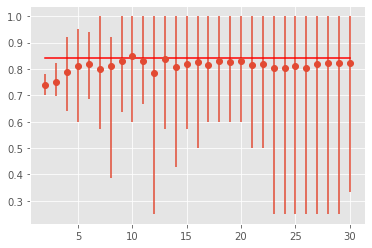

In [164]:
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
plt.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
plt.show()